In [1]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)


# Read Application csv

In [3]:
app_data = pd.read_csv("application_data[1].csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Data Inspection on Application dataset

Get info and shape on the dataset

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Data quality check

# check for percentage null values in Application dataset


In [5]:
pd.set_option("display.max_rows", 200)
app_data.isnull().mean() * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

conclusion: Columns with null values more than 47% may give wrong insights. Hence will drop them.
    

# Dropping columns with missing values greater than 47%

In [6]:
percentage = 47
threshold = int(((100 - percentage) / 100) * app_data.shape[0] + 1)
app_df = app_data.dropna(axis=1, thresh=threshold)
app_df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [7]:
app_df.shape

(307511, 73)

In [8]:
app_df.isnull().mean() * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

# impute missing values
# check the missing values in application dataset before imputing

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# occupation_type column has 31% missing values,since its a categorial column ,imputing the missing values with a unknown or others value

In [10]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [11]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [12]:
app_df.OCCUPATION_TYPE.fillna("others", inplace=True)


In [13]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [14]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

# EXT_SOURCE_3  column has 19% missing values


In [15]:
app_df.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [16]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [17]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

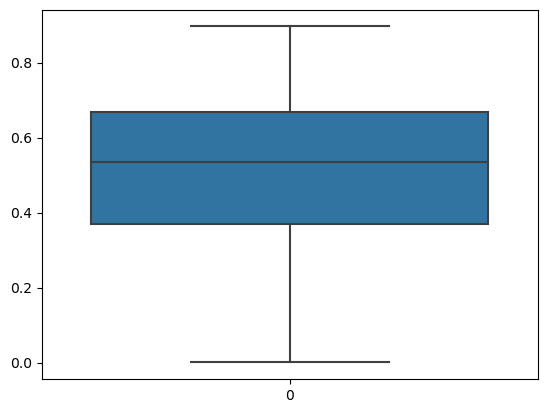

In [18]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

#conclusion : since its a numerical column with no outliers and there is not much difference between Mean and Median. Hence we can impute with Mean or Median

In [19]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(), inplace=True)

In [20]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [21]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100


0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [22]:
null_cols = list(app_df.isna().any())
len(null_cols)

73

In [23]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

# Handling missing values in columns with 13% null values

In [24]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [25]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

Conclusion : we conclude that 99% of valuesin the columns AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR IS 0.0 . Hence impute these columns with mode

In [26]:
Cols = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

In [27]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0], inplace = True)

In [28]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


# Handling missing values less than 1%

In [29]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [30]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [31]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [32]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
29.0      0.000326
47.0      0.000326
348.0     0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Conclusions : 
    -for categorial colomns , impute the missing values with mode
    -for numerical colomns , impute the missing values with median

In [33]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0], inplace = True)

In [34]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0], inplace = True)

In [35]:
# imputing numerical columns
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [36]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [37]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

# convert negative values to positive in days variables so that median is not affected

In [38]:
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply( lambda x: abs(x))
app_df["DAYS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply( lambda x: abs(x))
app_df["DAYS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply( lambda x: abs(x))
app_df["DAYS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply( lambda x: abs(x))
app_df["DAYS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply( lambda x: abs(x))

# Binning of continuous variables
standardizing Days Columns in Years for easy binning

In [39]:
app_df["YEARS_BIRTH"] = app_df.DAYS_BIRTH.apply( lambda x: int(x//356))
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply( lambda x: int(x//356))
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply( lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply( lambda x: int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply( lambda x: int(x//356))

# Binning AMT_CREDIT column

In [40]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: AMT_CREDIT, Length: 5603, dtype: float64

In [41]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [42]:
app_df["AMT_CREDIT_Category"] = pd.cut(app_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000], labels = ["Very low Credit", "Low Credit", "Medium Credit", "High Credit", "Very high credit"])


In [43]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
Very low Credit     14.035088
Very high credit    11.928504
Name: AMT_CREDIT_Category, dtype: float64

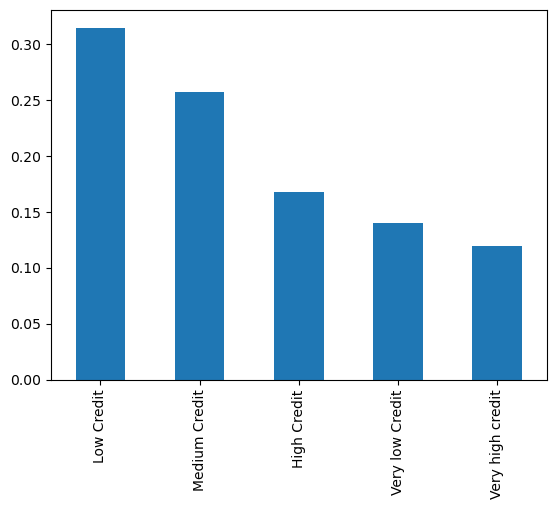

In [44]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

-conclusion: The credit amount for the loan (2L to 4L) or very high(Above 8L)

# Binning YEARS_BIRTH Columns

In [45]:
app_df["AGE_Category"] = pd.cut(app_df.YEARS_BIRTH, [0, 25, 45, 65, 85], labels = ["Below 25", "25-45", "45-65", "65-85"])


In [46]:
app_df.AGE_Category.value_counts(normalize=True)*100

25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: AGE_Category, dtype: float64

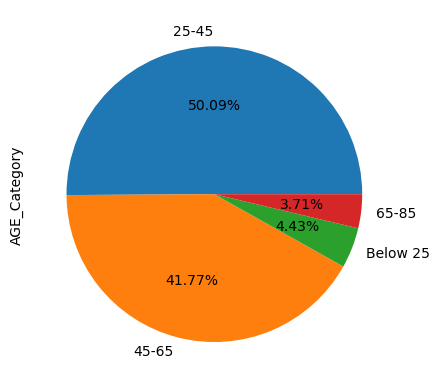

In [47]:
app_df["AGE_Category"].value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.show()

conclusion: Most of the applicants are between 25-45 age group

# Data Imbalance check

In [48]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

# Diving application dataset with target variables as 0 and 1

In [49]:
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [50]:
app_df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

conclusion: 1 out of 9/10 applicants are defaults

# Univariate Analysis

In [51]:
cat_cols = list(app_df.columns[app_df.dtypes == np.object])
num_cols = list(app_df.columns[app_df.dtypes == np.int64]) + list(app_df.columns[app_df.dtypes == np.float64])

In [52]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [53]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


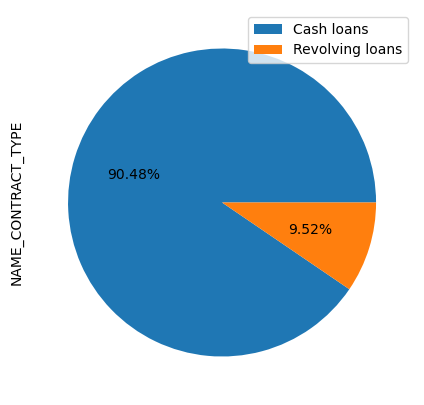

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


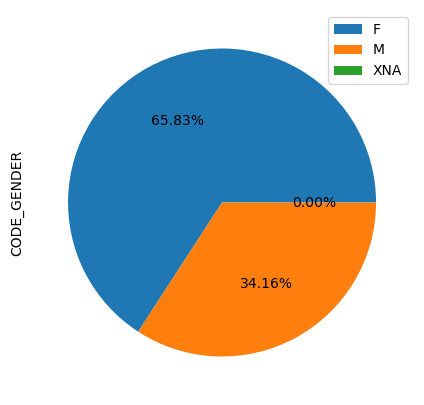

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


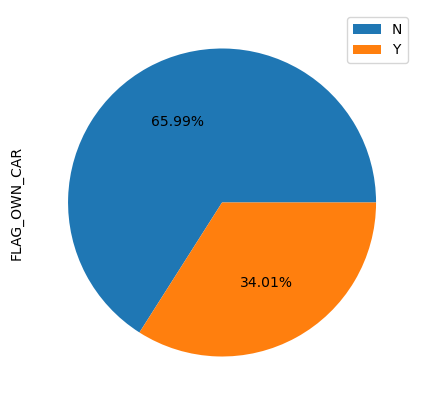

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


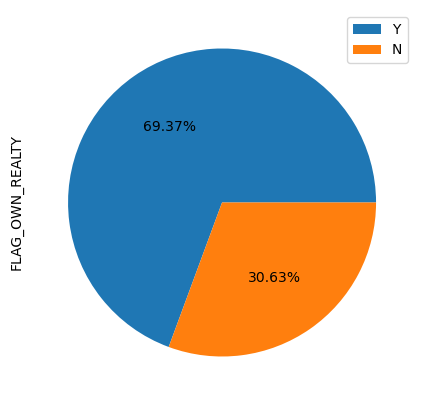

Unaccompanied      81.238720
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Other_A             0.281616
Group of people     0.088127
Name: NAME_TYPE_SUITE, dtype: float64


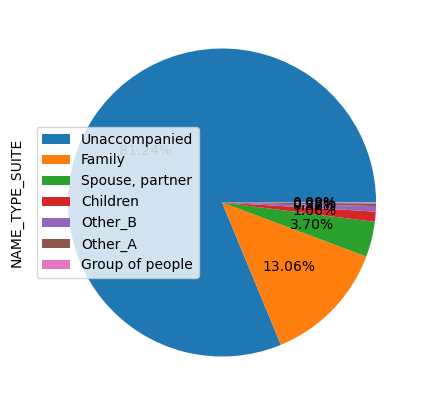

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


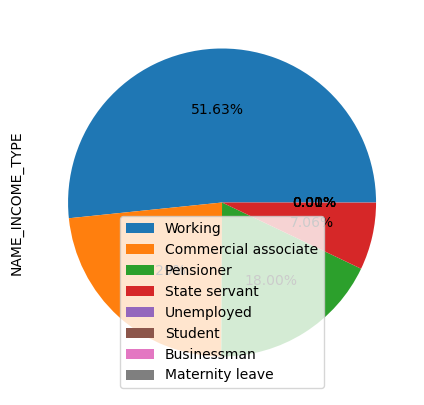

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64


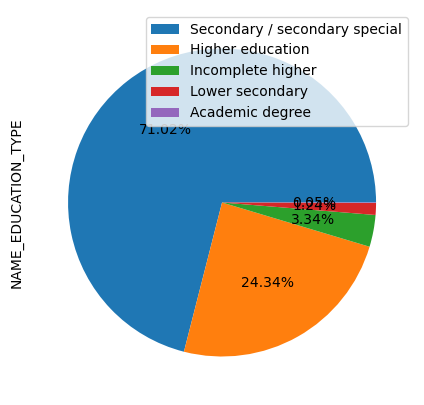

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64


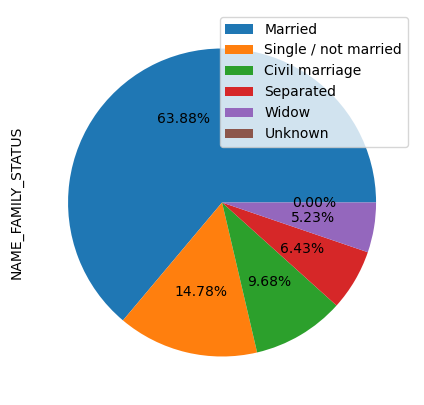

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64


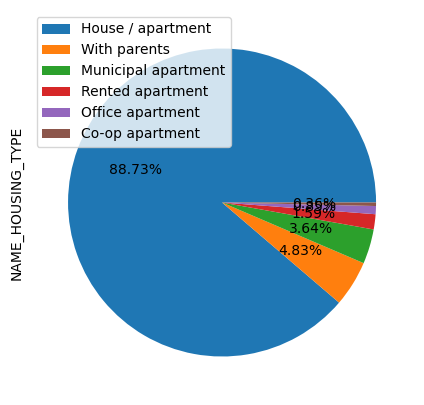

others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64


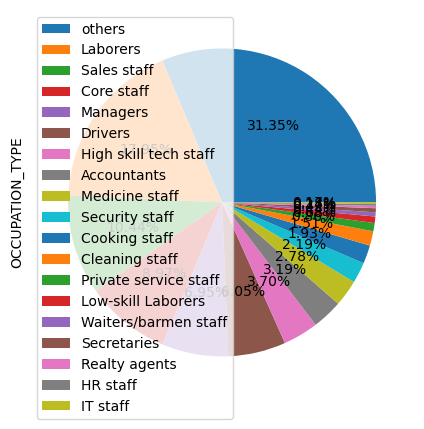

TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


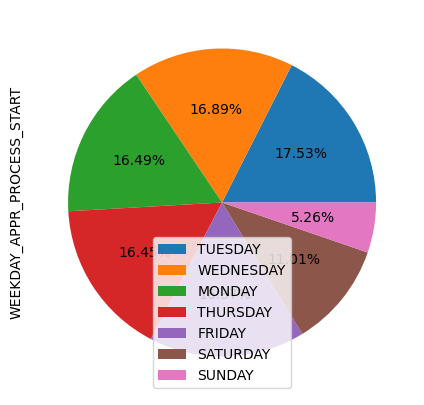

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

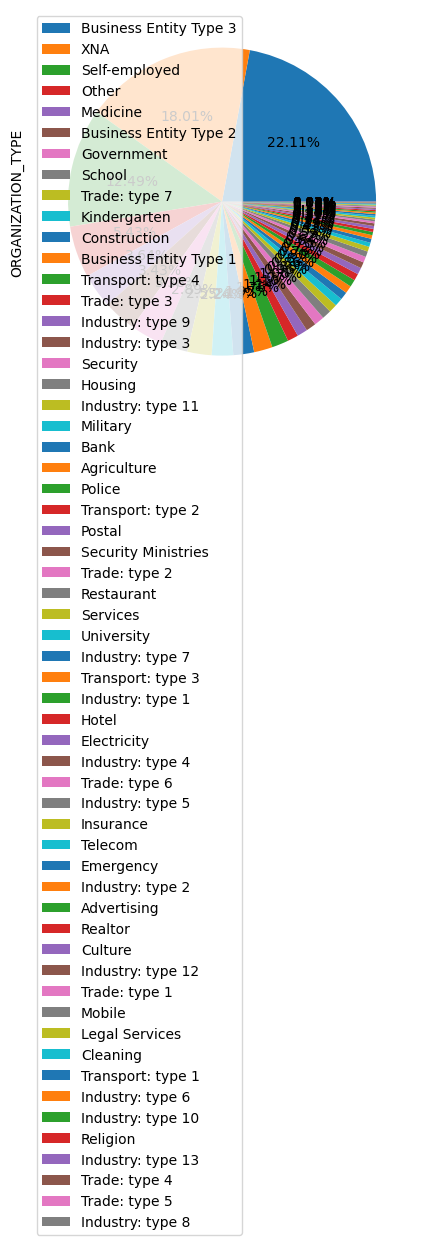

In [54]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance = None, autopct = '%1.2f%%')
    plt.legend()
    plt.show()

#  Conclusion >> insights on Below columns

1. NAME_CONTRACT_TYPE - More application have Cash loans than Revolving loans
2. CODE_GENDER - Number of Female applicants ate twice than that of male applicants
3. FLAG_OWN_CAR - Most(70%) of the applicants do not own a car
4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house
5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied
6. NAME_INCOME_TYPE - Most(51%) of the applicants are eaming their income from Work
7. NAME_EDUCATION_TYPE - 71% of the applicants have completed Secondary / secondary special education
8. NAME_FAMILY_STATUS - 63% of the applicants are married
9. MAME_HOUSING_TYPE - 88% of the housing type of appicants are House/apartment
10. OCCUPATION_TYPE - Most(31%) of the appicants have other Occupation ype
11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have appled the loan on Tuseday
12. ORGANIZATION_TYPE - Most ofthe Organization type of employees are Business Entry Type 3

# plot on numerical columns
# categorizing columns with and without flags

In [55]:
num_cols_withoutflag = []
num_cols_withflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [56]:
num_cols_withflag


['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [57]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


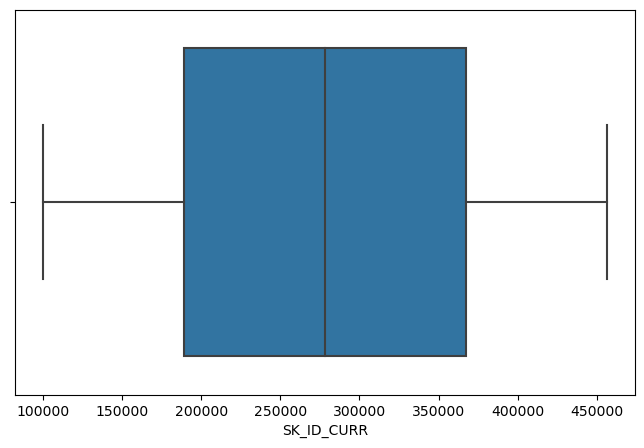

-------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


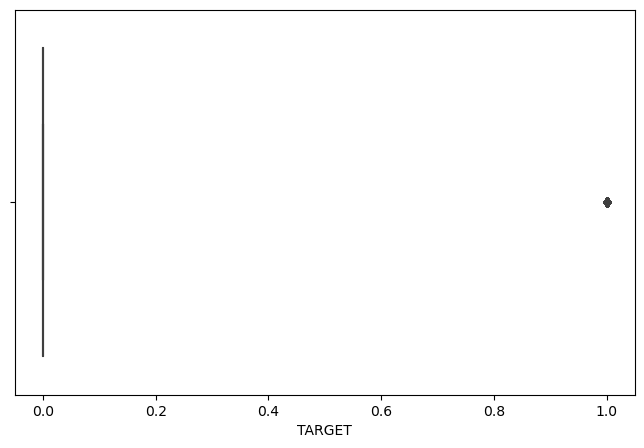

-------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


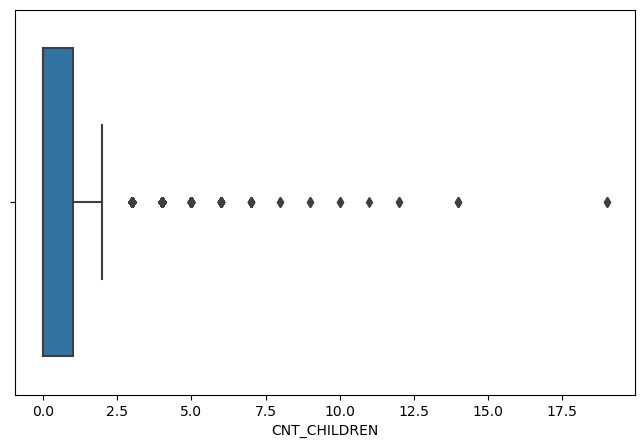

-------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


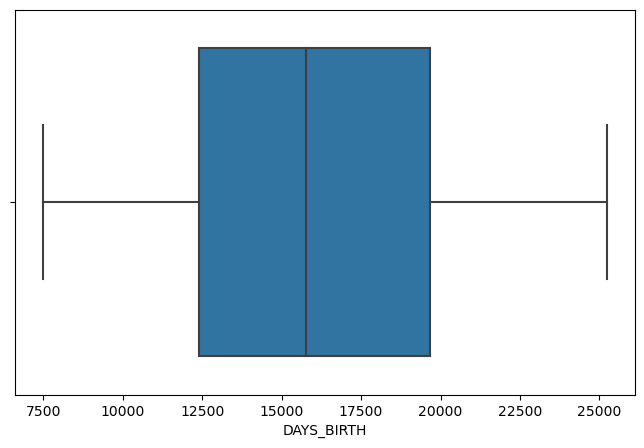

-------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


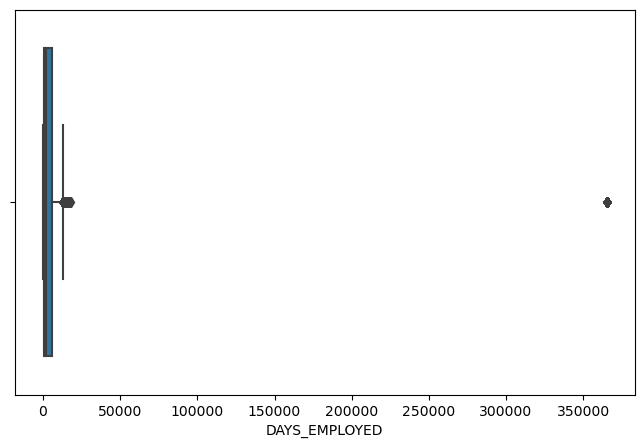

-------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


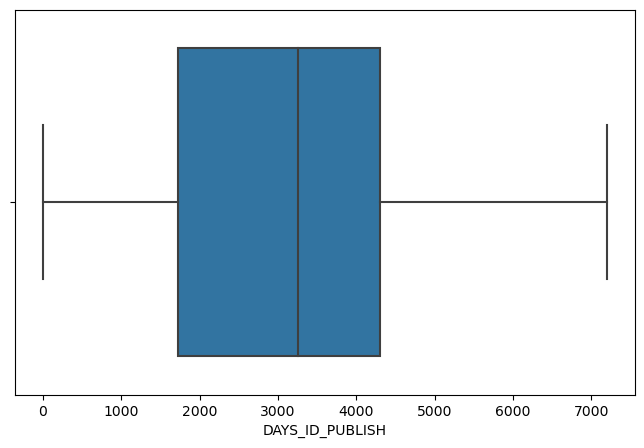

-------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


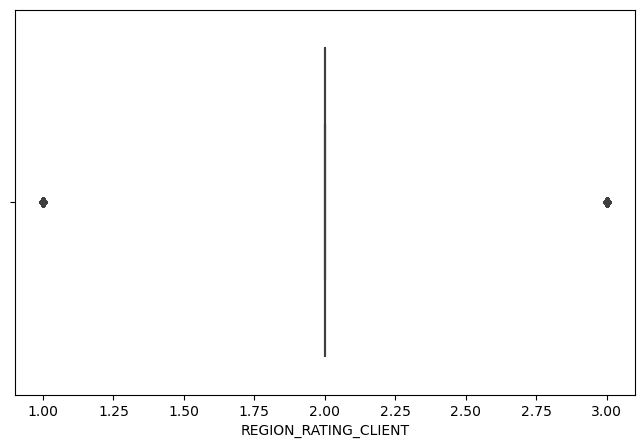

-------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


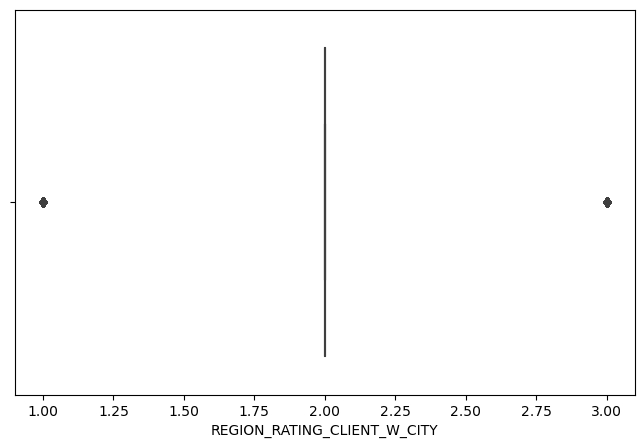

-------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


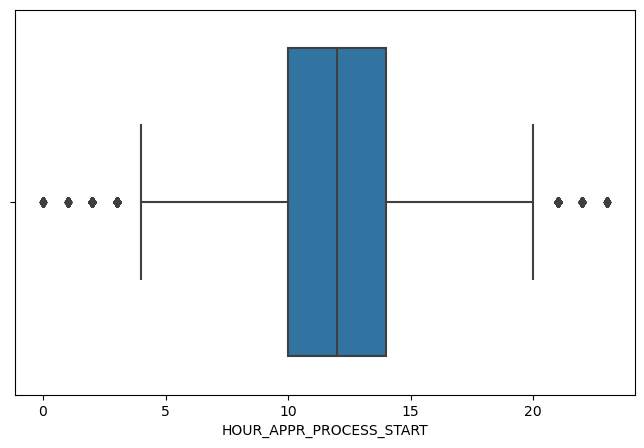

-------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


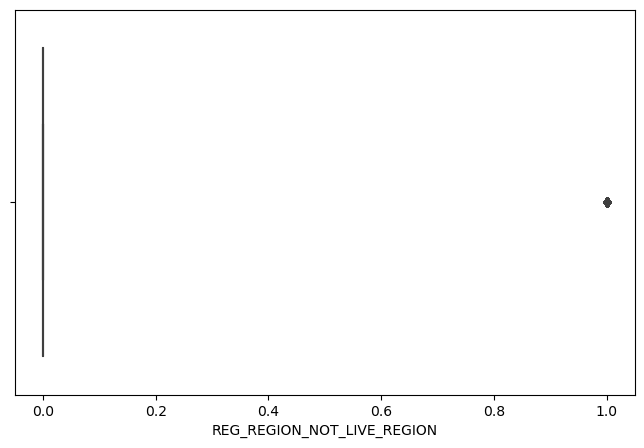

-------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


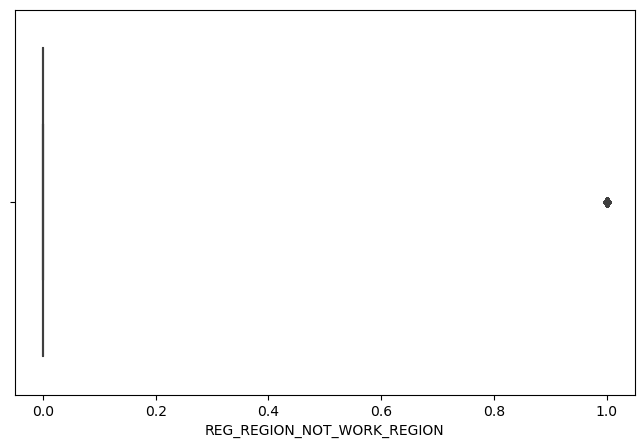

-------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


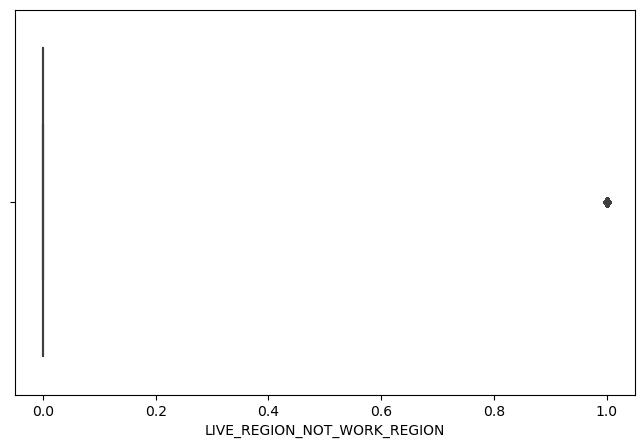

-------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


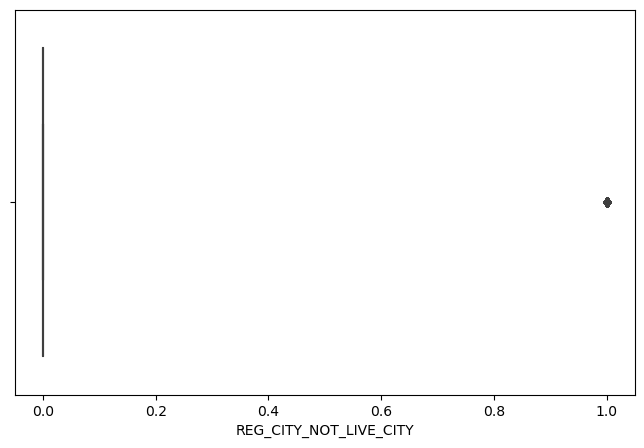

-------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


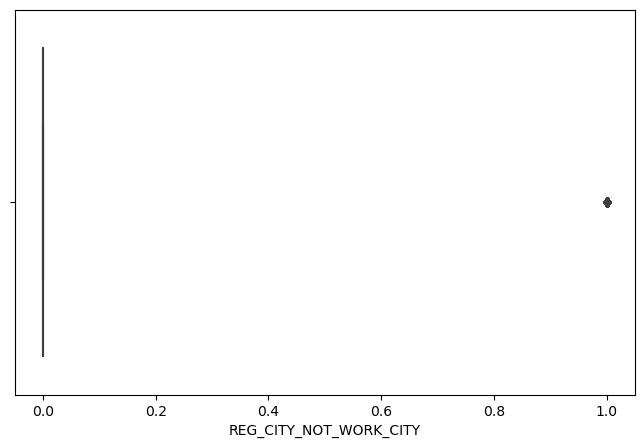

-------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


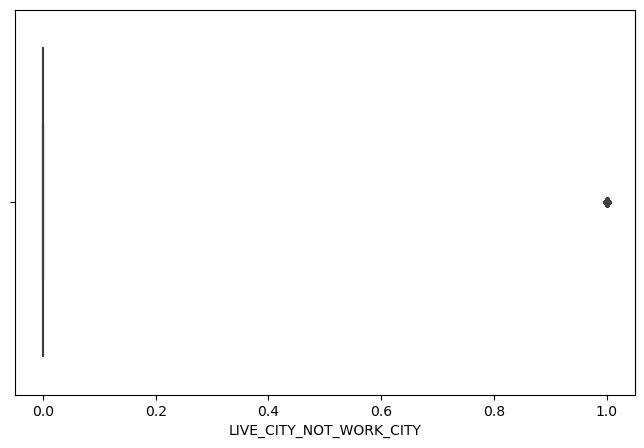

-------------
count    307511.000000
mean         44.548992
std          12.263409
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


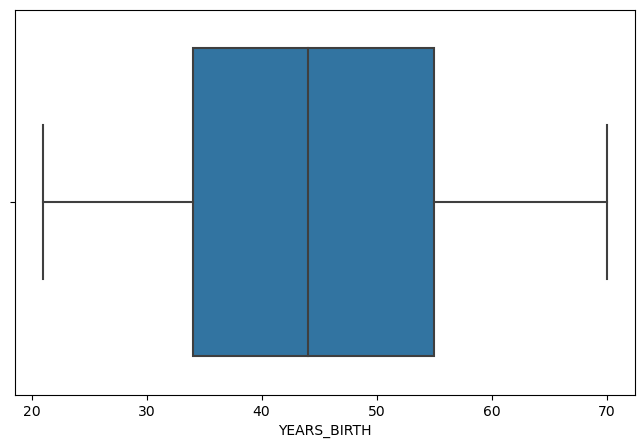

-------------
count    307511.000000
mean        189.656025
std         391.517218
min           0.000000
25%           2.000000
50%           6.000000
75%          16.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


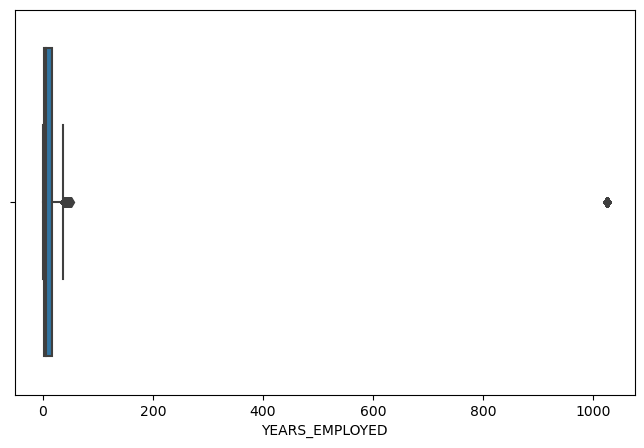

-------------
count    307511.000000
mean         13.513478
std           9.891137
min           0.000000
25%           5.000000
50%          12.000000
75%          21.000000
max          69.000000
Name: YEARS_REGISTRATION, dtype: float64


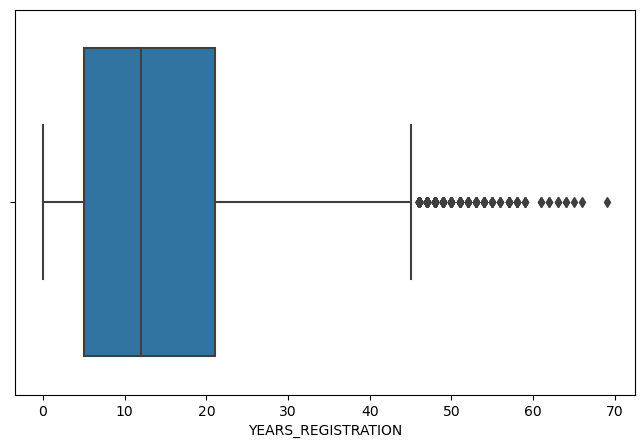

-------------
count    307511.000000
mean          7.920845
std           4.238167
min           0.000000
25%           4.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


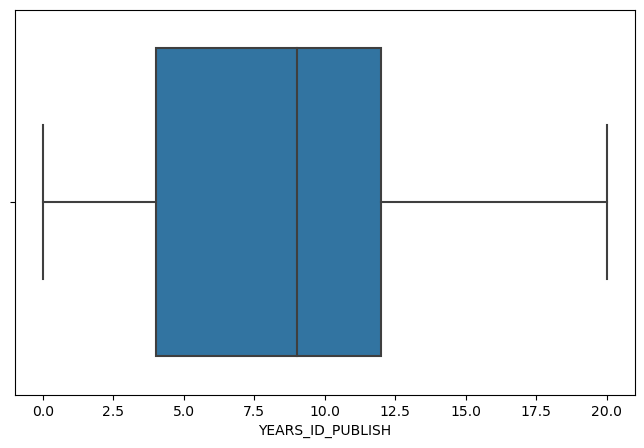

-------------
count    307511.000000
mean          2.293102
std           2.249671
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


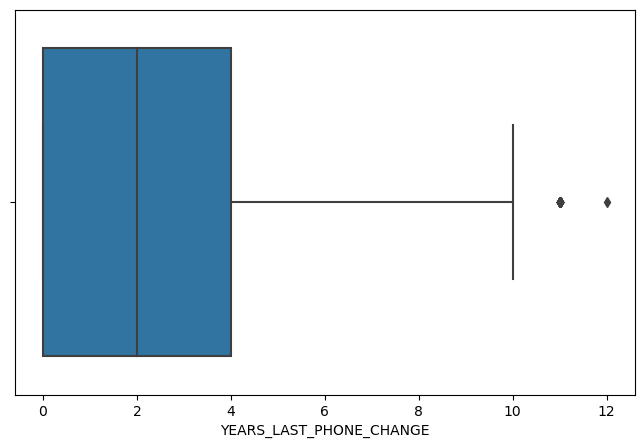

-------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


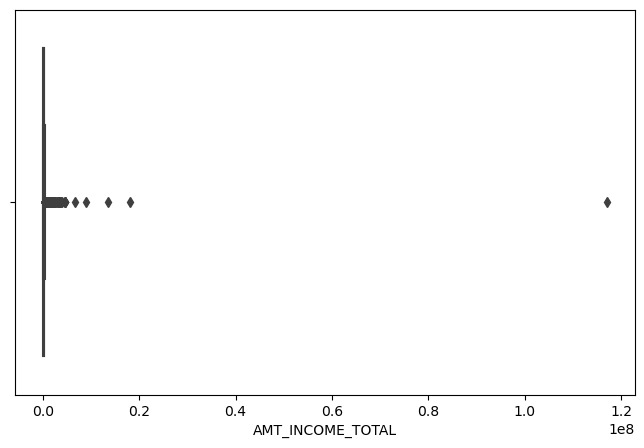

-------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


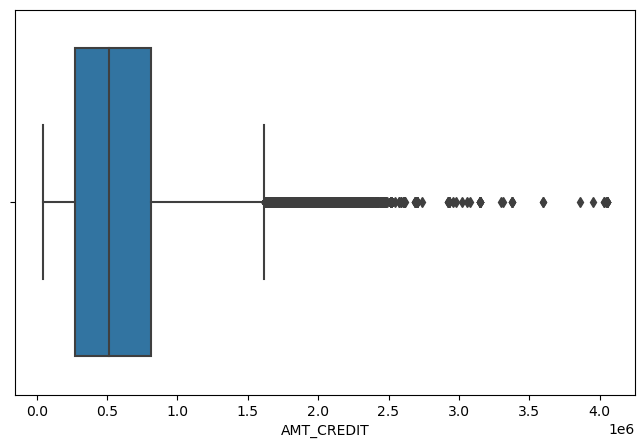

-------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


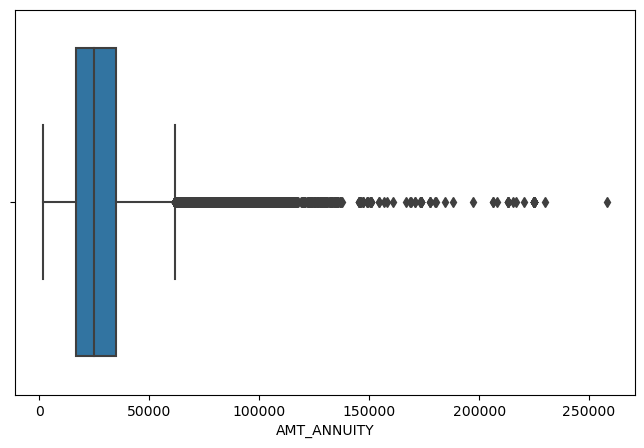

-------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


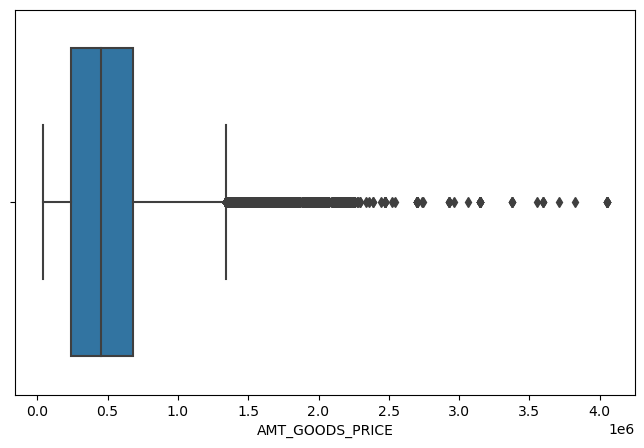

-------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


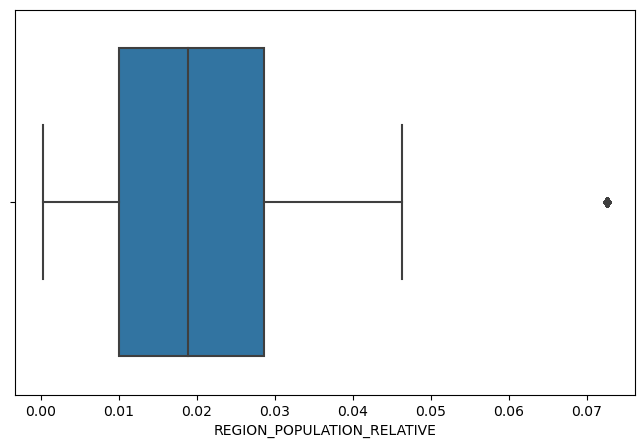

-------------
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


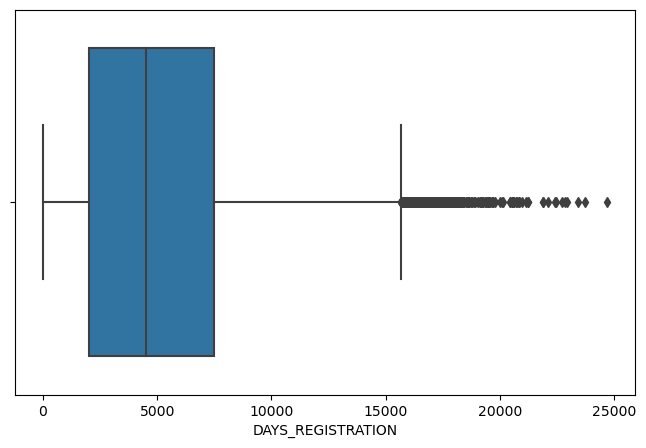

-------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


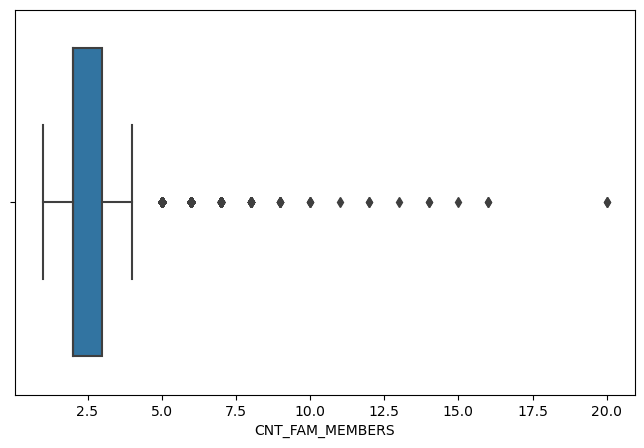

-------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


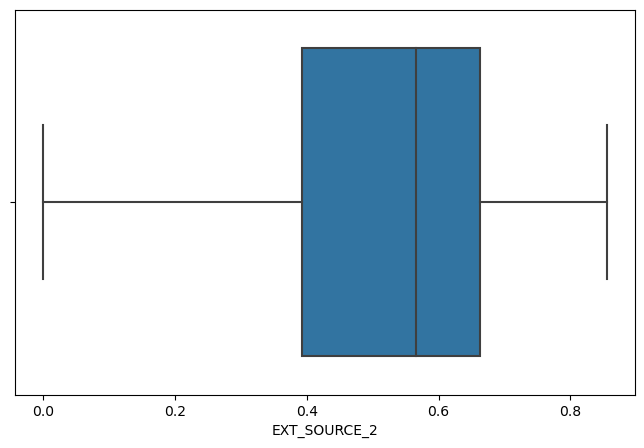

-------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


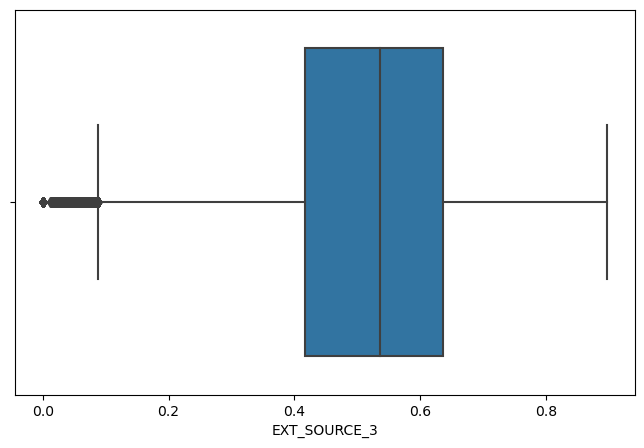

-------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


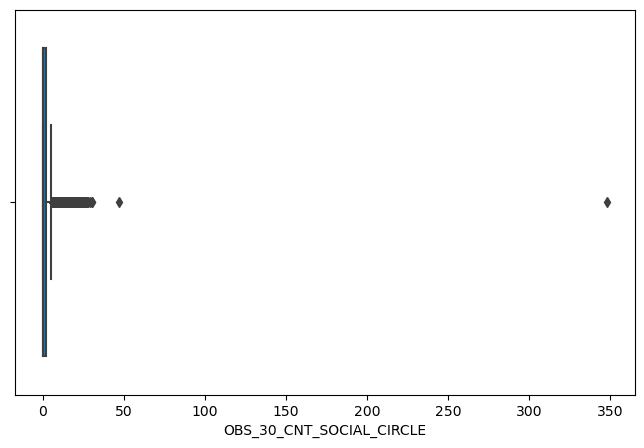

-------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


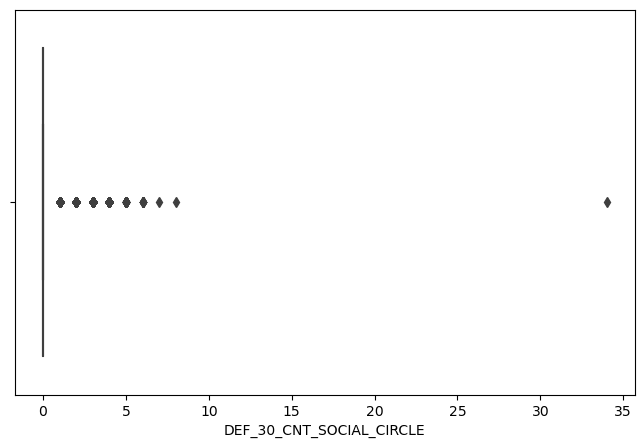

-------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


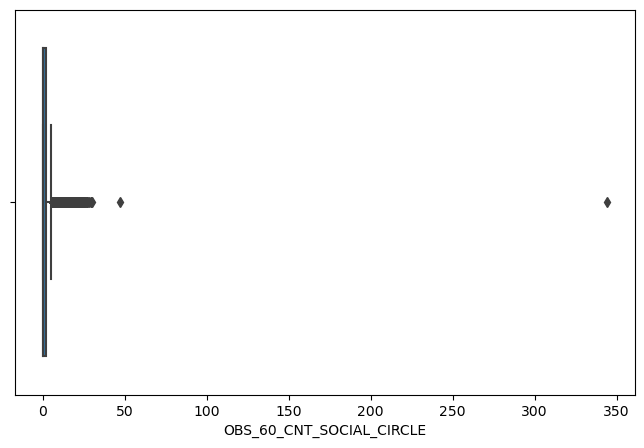

-------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


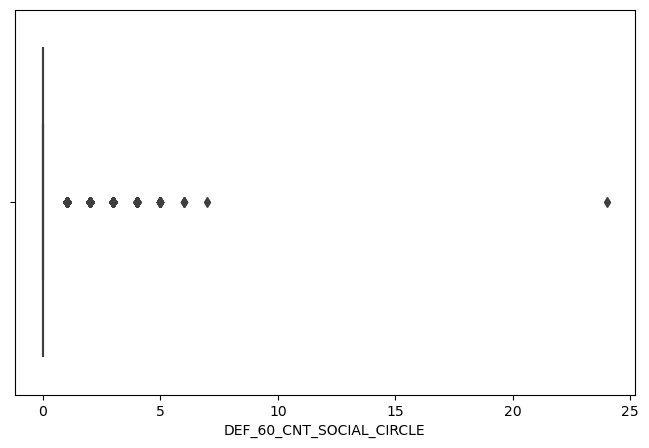

-------------
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


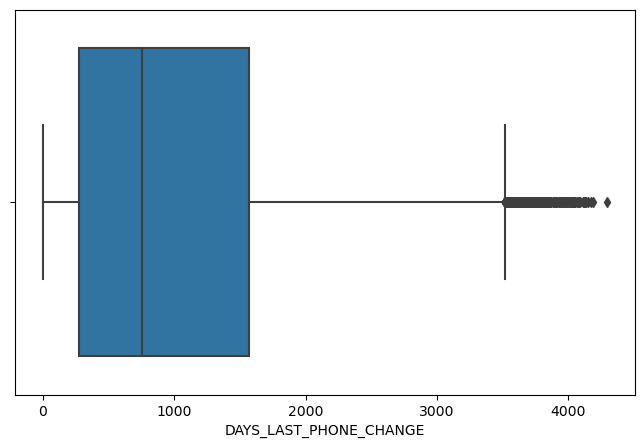

-------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


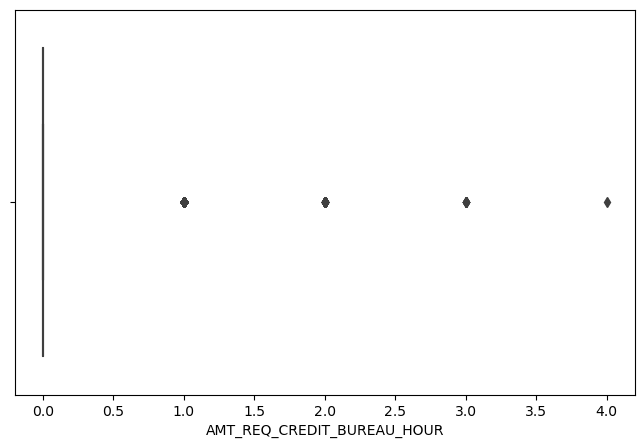

-------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


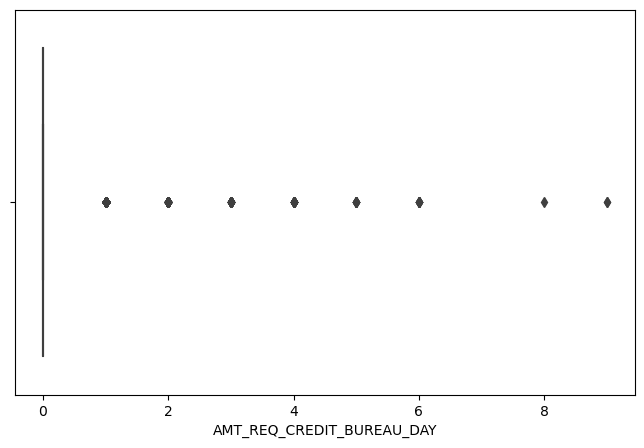

-------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


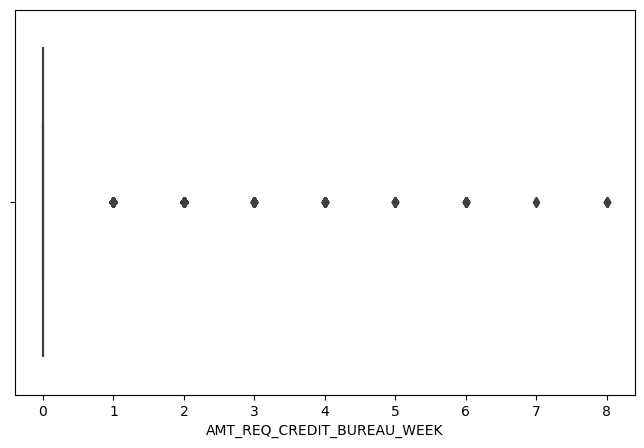

-------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


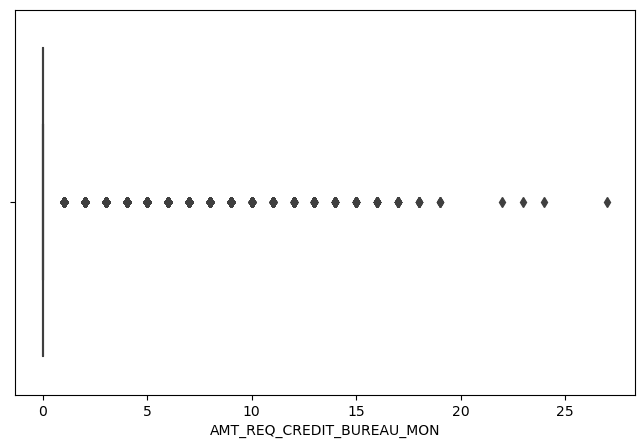

-------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


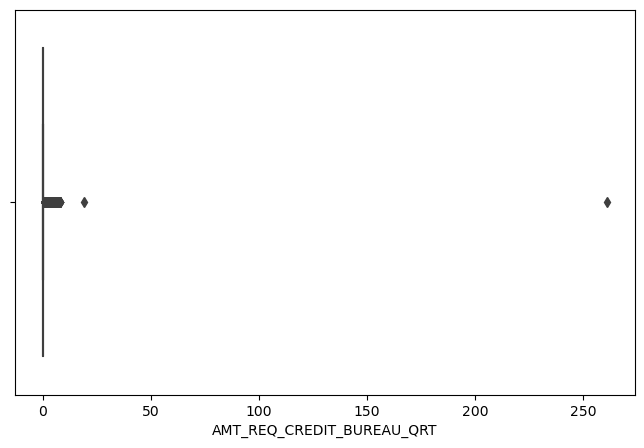

-------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


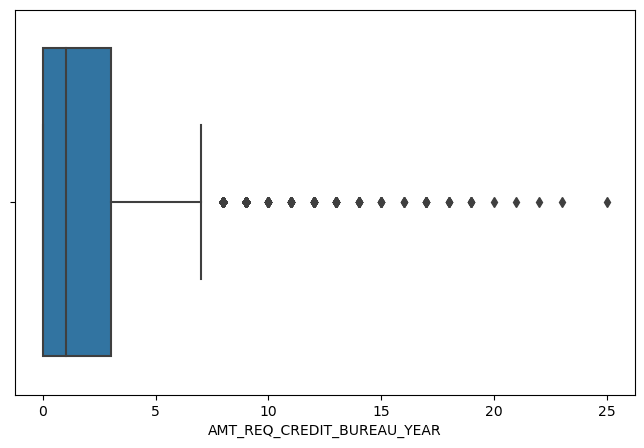

-------------


In [58]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize = [8,5])
    sns.boxplot(data=app_df, x=col)
    plt.show()
    print("-------------")

# Conclusion >> Few Columns are with outliers are below

1. AMT_INCOME_TOTAL Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge
variation in mean and median due to outliers

2. AMT_CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variaton
in mean and median due to outers

3. AMT_ANNUITY Column has a few outliers and there is a huge difference between the 95th percentile and the max value, also we could see significant
variation in mean and median due to outers

4. AMT_GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentie and the max value, also We could see
signiicant variation in mean and median due to outliers

5. REGION_POPULATION_RELATIVE Column has a one outliers and there not much difierence between mean and median


# Univariate analysis on columns with Target 0 and 1 

Plot on (col) for Target 0 and 1


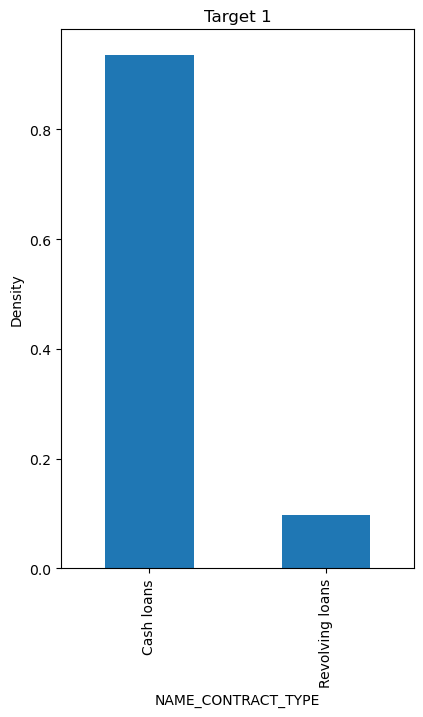



-------------------


Plot on (col) for Target 0 and 1


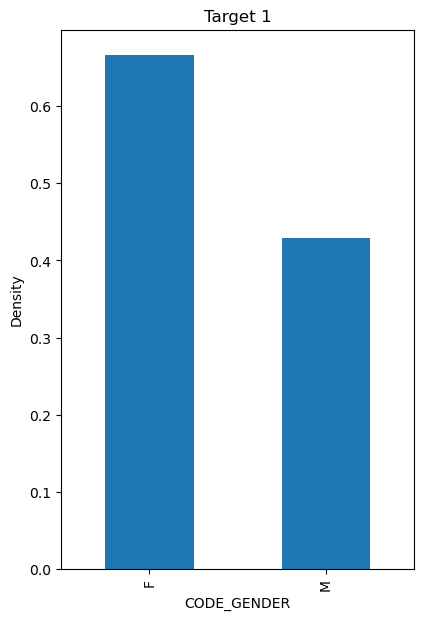



-------------------


Plot on (col) for Target 0 and 1


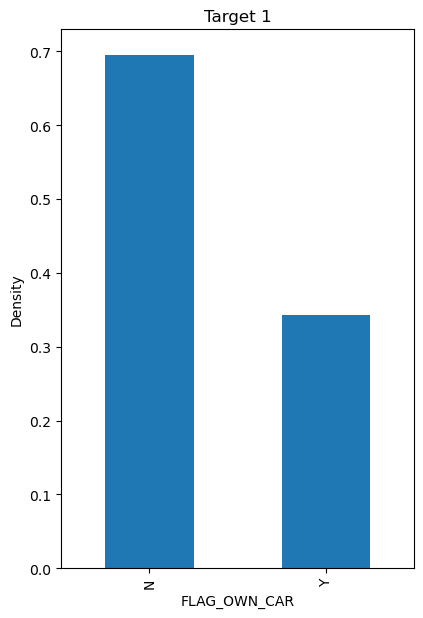



-------------------


Plot on (col) for Target 0 and 1


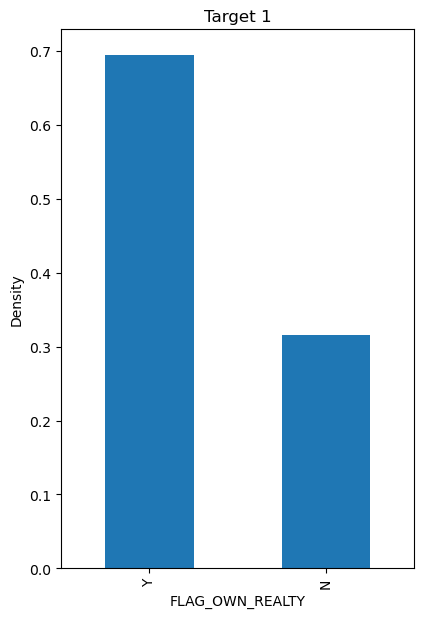



-------------------


Plot on (col) for Target 0 and 1


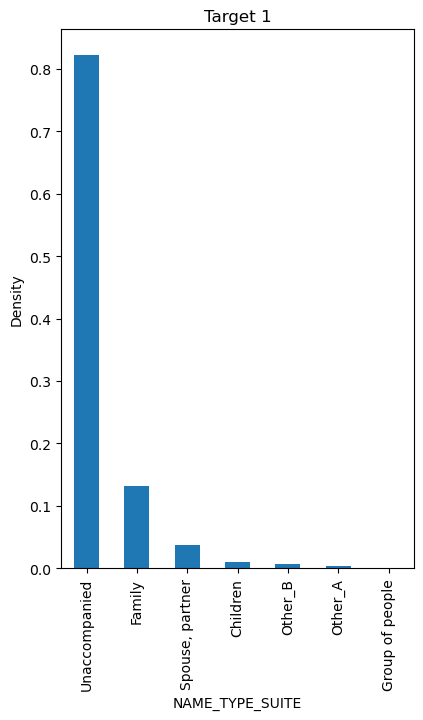



-------------------


Plot on (col) for Target 0 and 1


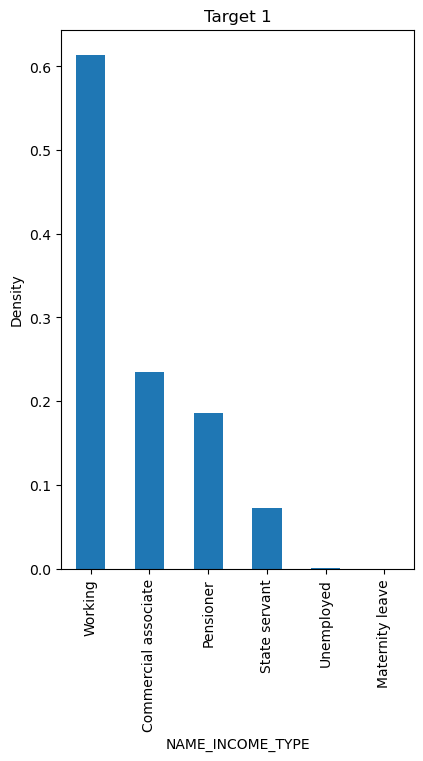



-------------------


Plot on (col) for Target 0 and 1


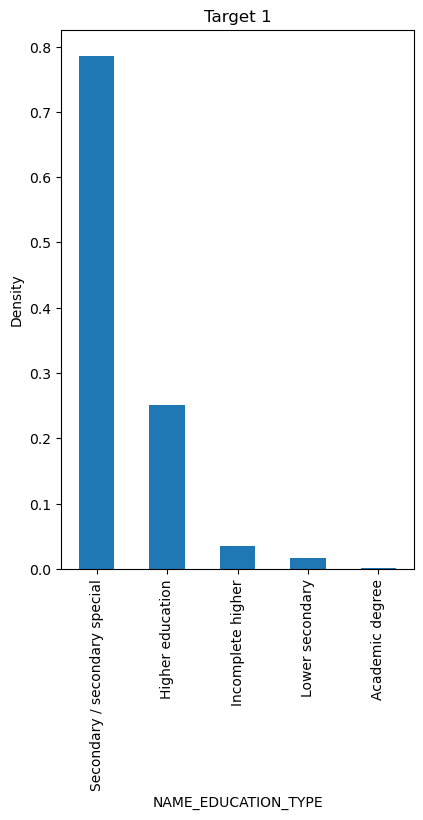



-------------------


Plot on (col) for Target 0 and 1


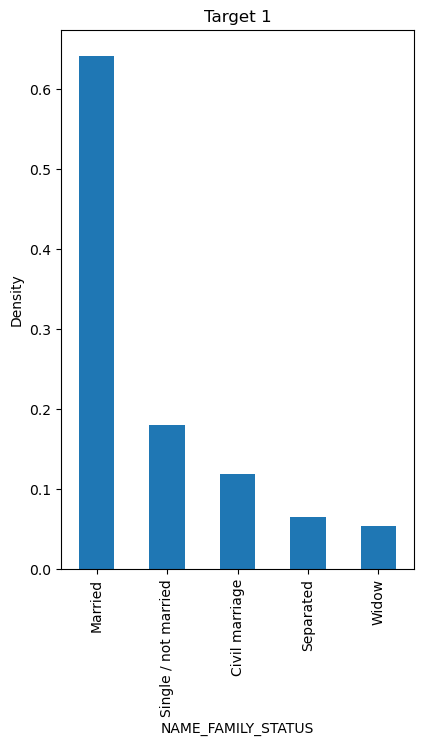



-------------------


Plot on (col) for Target 0 and 1


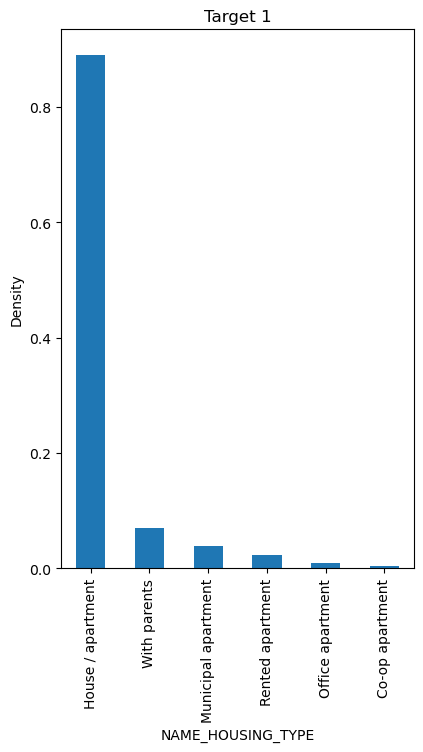



-------------------


Plot on (col) for Target 0 and 1


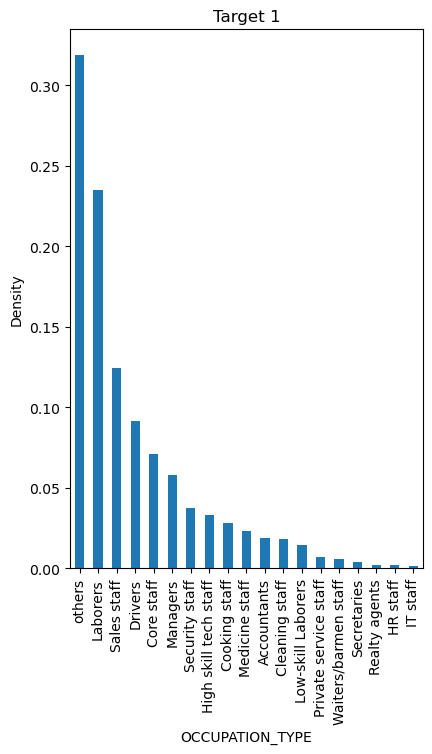



-------------------


Plot on (col) for Target 0 and 1


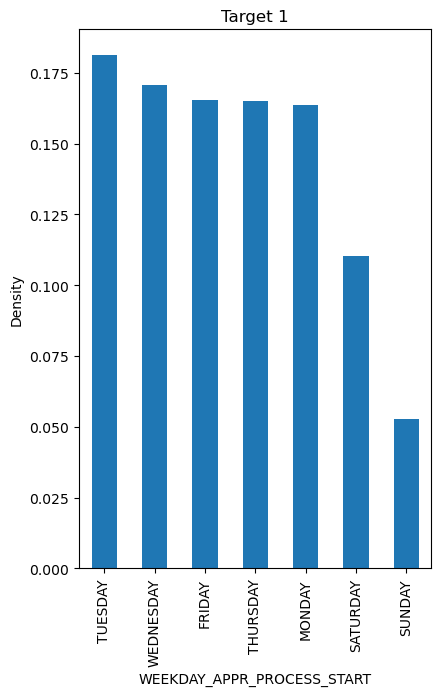



-------------------


Plot on (col) for Target 0 and 1


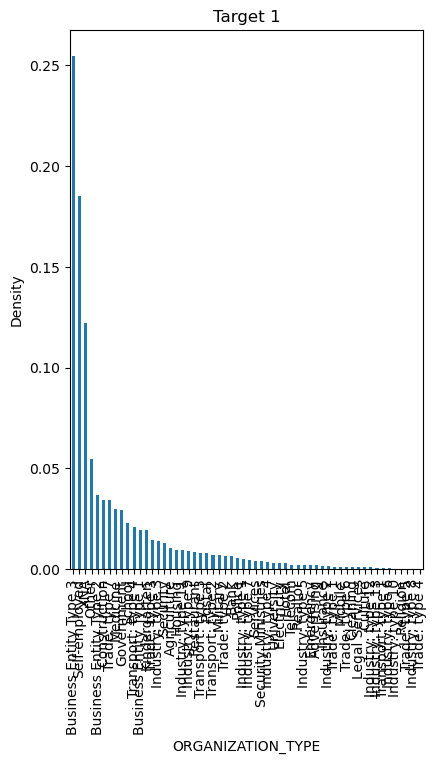



-------------------




In [59]:
for col in cat_cols:
    print(f"Plot on (col) for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n-------------------\n\n")

Conclusion >> insights on Below columns

1. NAME_CONTRACT_TYPE - The application are receiving more of cash loans than Revolving loans both for Target 0 and 1
2. CODE_GENDER - Number of Female applicants are twice than that of male applicants both for Target 0 and 1
3. FLAG_OWN_CAR - Most(70%) of the applicants do not own a car both for Target 0 and 1
4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house both for Target 0 and 1
5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied both for Target 0 and 1
6. NAME_INCOME_TYPE - Most(51%) of the applicants are eaming their income from Work both for Target 0 and 1
7. NAME_EDUCATION_TYPE - 71% of the applicants have completed Secondary / secondary special education both for Target 0 and 1
8. NAME_FAMILY_STATUS - 63% of the applicants are married both for Target 0 and 1
9. MAME_HOUSING_TYPE - 88% of the housing type of appicants are House/apartment both for Target 0 and 1
10. OCCUPATION_TYPE - Most(31%) of the appicants have other Occupation type are non defaulters and labourere ,sales staff,Drivers, and core staff are not able to repay on time
11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have appled the loan on Tuseday and the least on sunday
12. ORGANIZATION_TYPE - Most ofthe Organization type of employees are Business Entry Type 3,self employed and other organization type

# Analysis on AMT_GOODS_PRICE on Target 0 and 1

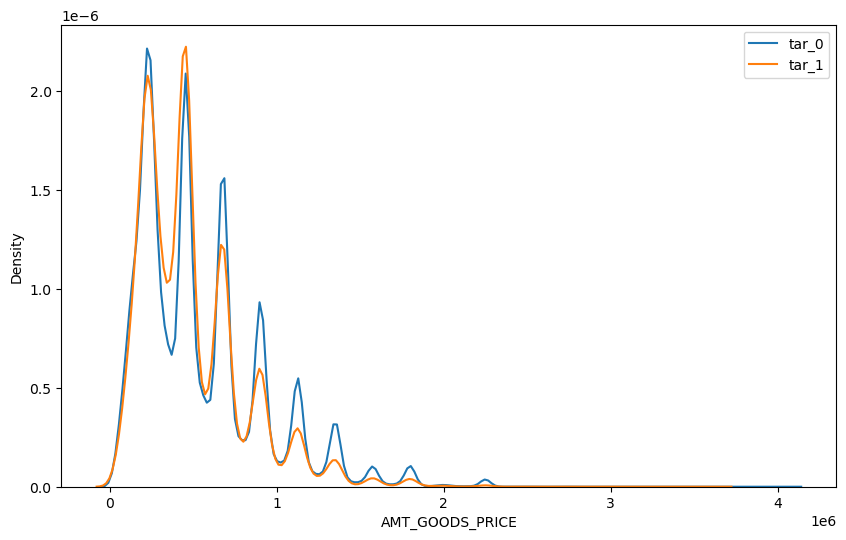

In [60]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'], label='tar_0', hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'], label='tar_1', hist=False)
plt.legend()
plt.show()

conclusion: The price of the goods for which loan is given has the same variation for Target 0 and 1

# Bivariate and Multivariate analysis

# Bivariate analysis between WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

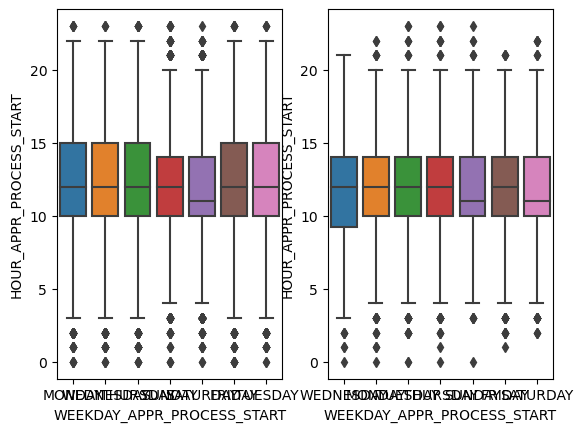

In [61]:
# plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START' , y = 'HOUR_APPR_PROCESS_START', data= tar_0 )
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START' , y = 'HOUR_APPR_PROCESS_START', data= tar_1 )
plt.show()

 Conclusion >>

1. The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm.

2. We can observe that around 11:30am to 12pm around 50% of Customers vist the branch for loan application on all the days except for Saturday where
the time is between 10am to 11am for both Target 0 and 1

3. The loan defaulters have applied for the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the
loan between 10am to 3pm


# Bivariate analysis between AGE_CATEGORY vs AMT_CREDIT

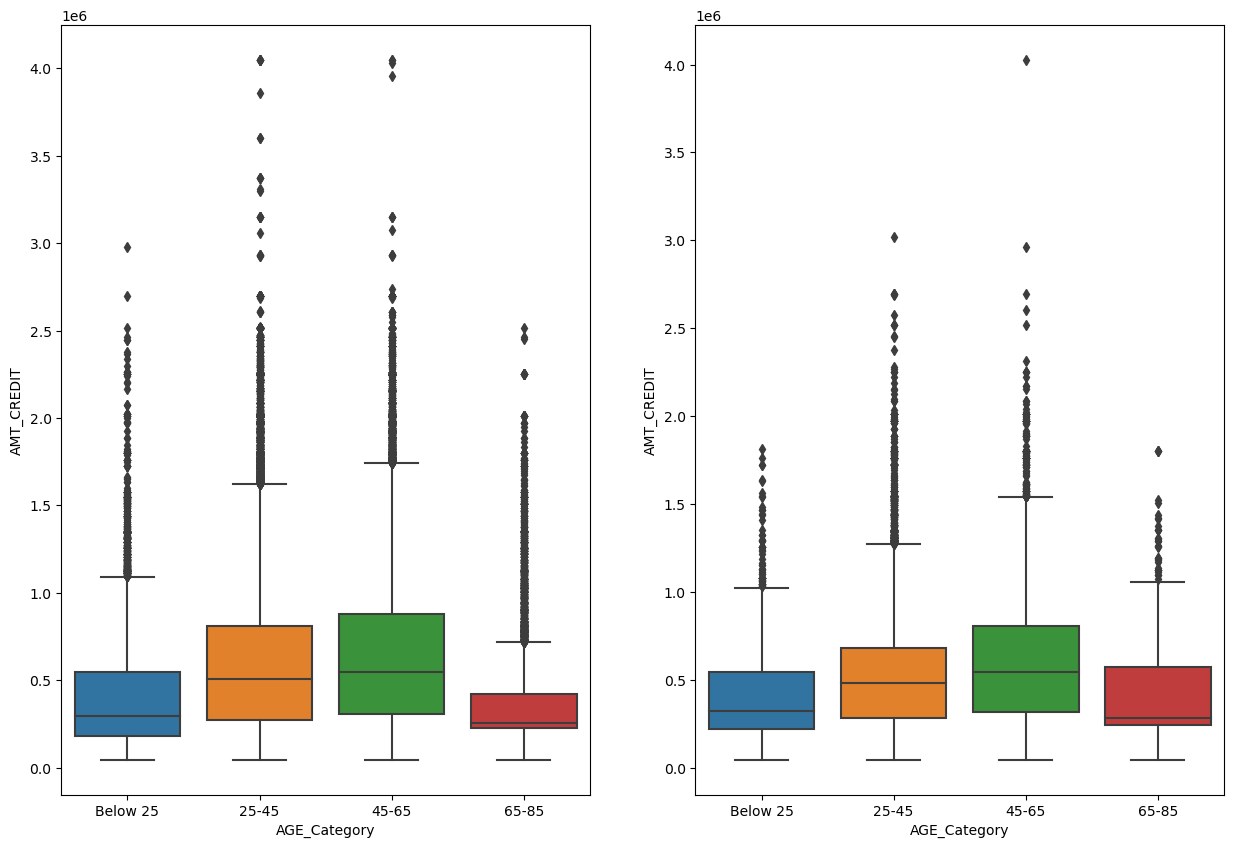

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='AGE_Category' , y = 'AMT_CREDIT', data= tar_0 )
plt.subplot(1,2,2)
sns.boxplot(x='AGE_Category' , y = 'AMT_CREDIT', data= tar_1 )
plt.show()

 Conclusion >>

1. The applicants between age group 25 to 65 have Credt amount of the oan less than 2500000 and are abe to repay the loan property
2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters
3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age

# Pair Plot of Amount columns for Target 0

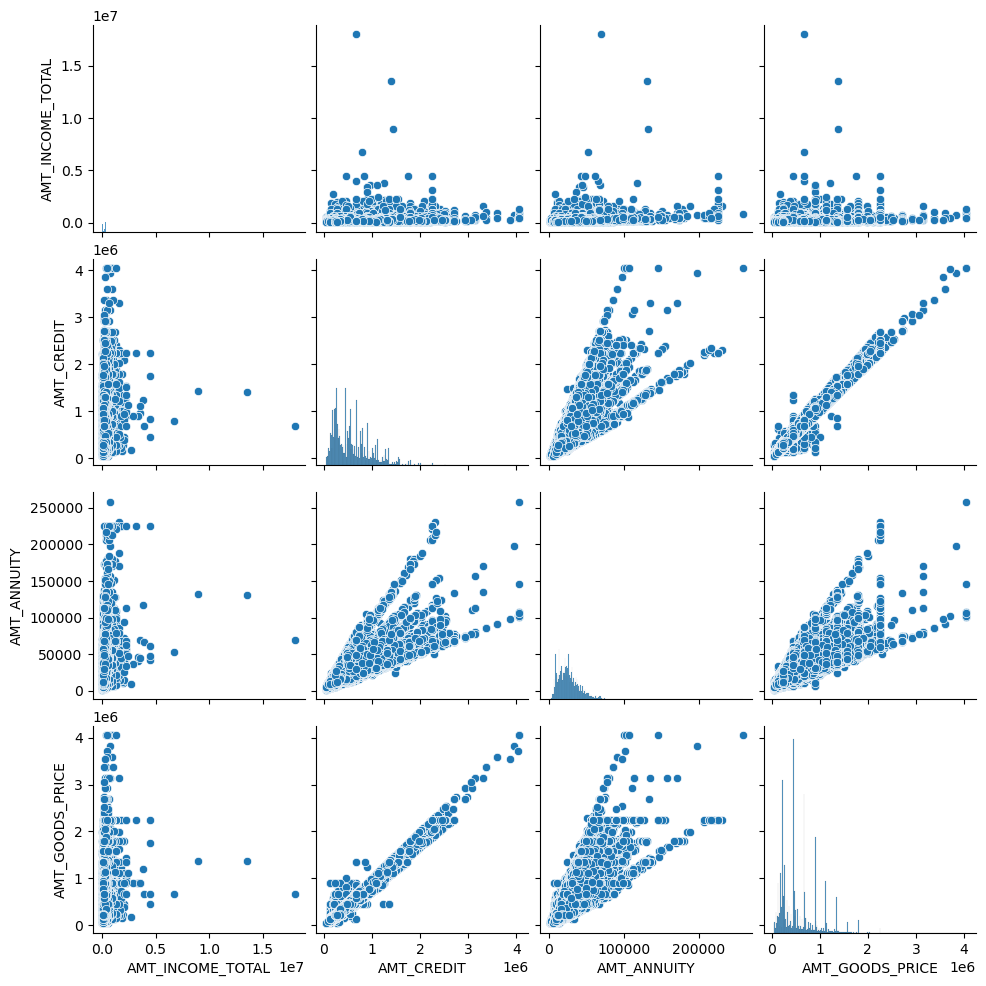

In [63]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

 Conclusion >> For Applicants who are able  to repay the loan on time

1. AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY
2. AMT_ANNUITY Increases with increases in AMT_GOODS_PRICE and AMT_Credt
3. AMT_GOODS_PRICE Increases with Increases im AMT_Credit and AMT_ANNUITY
4. AMT_INCOME_TOTAL has a drastic Increase with sight increase in AMT_CREDITAMT_ANNUITY, AMT_GOODS_ PRICE

# Pair Plot of Amount columns for Target 1

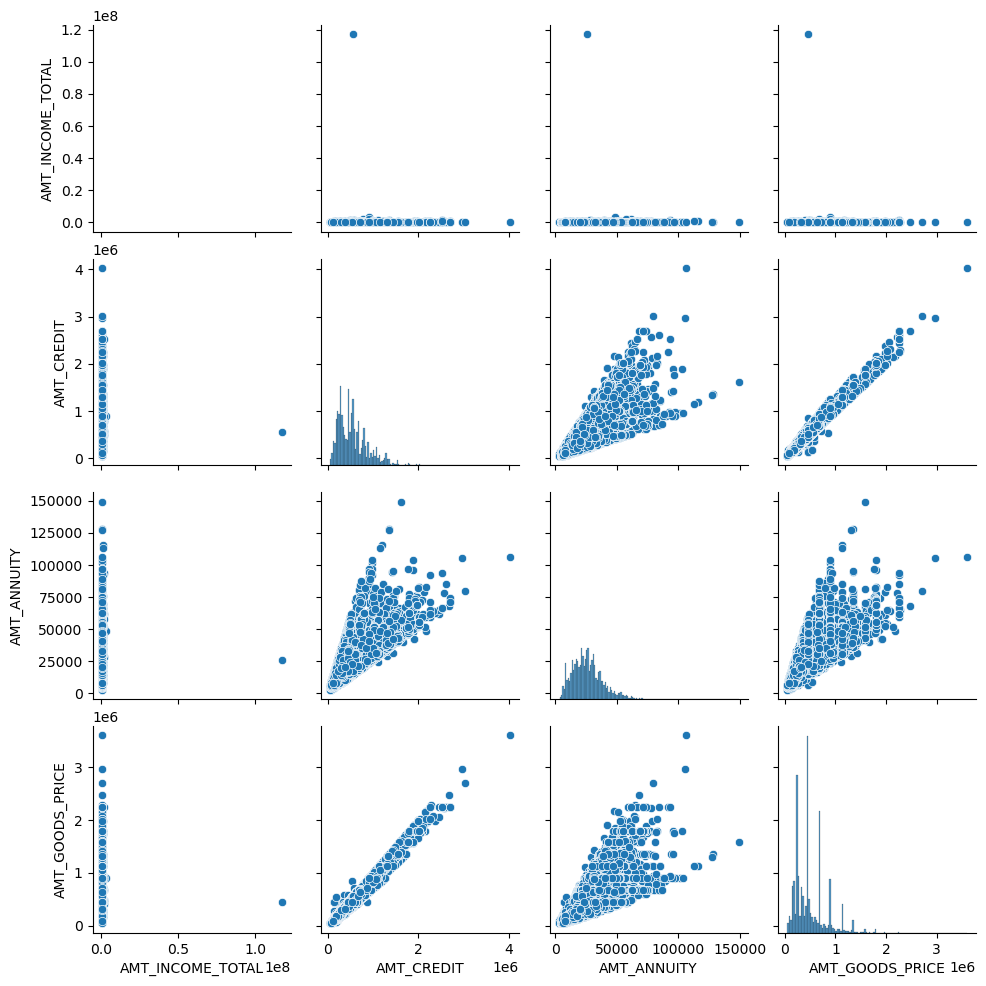

In [64]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

Conclusion >> For Applicants who are unable to repay the loan on time

1. AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY
2. AMT_ANNUITY Increases with increases in AMT_GOODS_PRICE and AMT_Credt
3. AMT_GOODS_PRICE Increases with Increases im AMT_Credit and AMT_ANNUITY
4. AMT_INCOME_TOTAL has a drastic Increase with sight increase in AMT_CREDITAMT_ANNUITY, AMT_GOODS_ PRICE

# co-relation between numerical columns

In [65]:
corr_data = app_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                  10                 5   
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [66]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
YEARS_BIRTH                     -0.027239    0.055373    -0.009519   
YEARS_EMPLOYED                  -0.063837   -0.064321    -0.102849   
YEARS_REGISTRATION              -0.027882   -0.009590    -0.038487   
YEARS_ID_PUBLISH                -0.008459    0.006942    -0.011376   
YEARS_LAST_PHONE_CHANGE          0.018571    0.077257     0.064494   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027239       -0.063837   
AMT_CREDIT                      0.986734     0.055373       -0.064321   
AMT_ANNUITY                     0.774837    -0.009519       -0.102849   
AMT_GOODS_PRICE                 1.000000     0.053449       -0.062193   
YEARS_BIRTH                     0.053449     1.000000        0.623745   
YEARS_EMPLOYED                 -0.062193     0.623745        1.000000   
YEARS_REGISTRATION             -0.011518     0.331856        0.214652   
YEARS_ID_PUBLISH                0.009647     0.272054        0.274644   
YEARS_LAST_PHONE_CHANGE         0.079349     0.086317       -0.016424   

                         YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027882         -0.008459   
AMT_CREDIT                        -0.009590          0.006942   
AMT_ANNUITY                       -0.038487         -0.011376   
AMT_GOODS_PRICE                   -0.011518          0.009647   
YEARS_BIRTH                        0.331856          0.272054   
YEARS_EMPLOYED                     0.214652          0.274644   
YEARS_REGISTRATION                 1.000000          0.101831   
YEARS_ID_PUBLISH                   0.101831          1.000000   
YEARS_LAST_PHONE_CHANGE            0.058393          0.092803   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018571  
AMT_CREDIT                              0.077257  
AMT_ANNUITY                             0.064494  
AMT_GOODS_PRICE                         0.079349  
YEARS_BIRTH                             0.086317  
YEARS_EMPLOYED                         -0.016424  
YEARS_REGISTRATION                      0.058393  
YEARS_ID_PUBLISH                        0.092803  
YEARS_LAST_PHONE_CHANGE                 1.000000

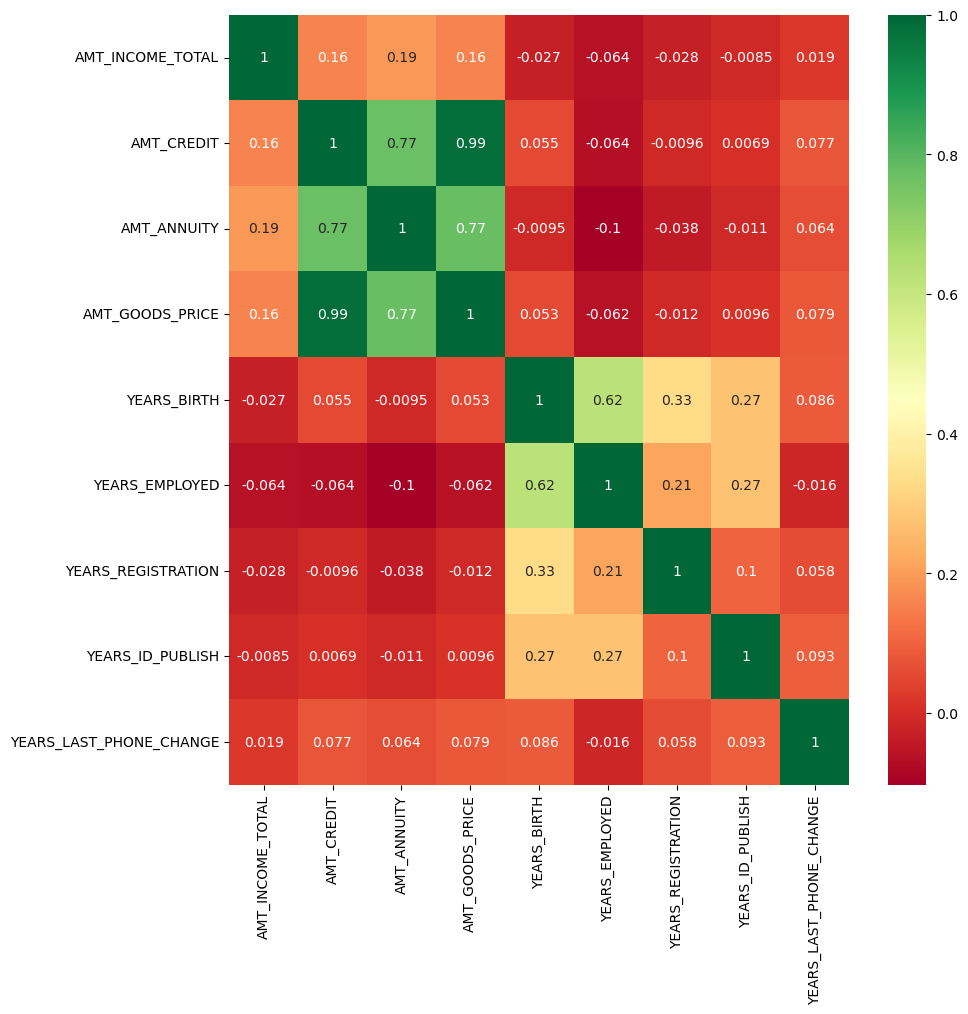

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True, cmap="RdYlGn")
plt.show()

 conclusion 
    
1. AMT_INCOME_TOTAL - It has a postive corelation index of 0 16,0.19,0.16 with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_ PRICE respectively

2. AMT_CREDIT - Is has negative coretaion index of 0.064 wih YEARS_EMPLOYED and postive coreltaion index of 0.99,0.77 with AMT_GOODS_PRICE,
AMT_ANNUITY respectively

3. AMT_ANNUITY - Is has negative coreltaion index of 0.1 with YEARS_EMPLOYED and postive coreltaion index of 0.77 wih AMT_CREDIT

4. AMT_GOODS_PRICE -Ithas a postive corelavion with AMT_CREDIT,AMT_ANNUITY

5. YEARS_BIRTH -It has a positive corelation with YEARS_EMPLOYED, AMT_GOODS. PRICE and negative corekaion with
AMT_ANNUITY,AMT_INCOME_TOTAL

6. YEARS_EMPLOYED - Is has negate coretaion index of 0.1 with AMT_ANNUITY and nas a posite corelaton with YEARS_REGISTRATION,
YEARS_ID_PUBLISH

7. YEARS_REGISTRATION - It has a postive corelation with YEARS_IO_PUBLISH, YEARS_BIRTH, YEARS_EMPLOYED

8. YEARS_ID_PUBLISH -Ithas a positive corelation with YEARS_REGISTRATION and negative coreltaion wth AMT_INCOME_TOTAL,AMT_ANNUITY

9. YEARS_LAST_PHONE_CHANGE -Ithas negative corettaion win YEARS_EMMPLOYED and positve corelaton with AMT_GOODS_PRICE,
YEARS_ID_PUBLISH

# Split the Numerical variables based on Target 0 and 1 to find the co-relation

In [68]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   
5           99000.0    490495.5      27517.5         454500.0           47   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   
5               4                  13                 1   

   YEARS_LAST_PHONE_CHANGE  
1                        2  
2                        2  
3                        1  
4                        3  
5                        7

In [69]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           26   
26          112500.0    979992.0      27076.5         702000.0           52   
40          202500.0   1193580.0      35028.0         855000.0           49   
42          135000.0    288873.0      16258.5         238500.0           37   
81           81000.0    252000.0      14593.5         252000.0           69   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                1                  10                 5   
26               7                  18                 5   
40               3                   3                 2   
42              10                   0                12   
81            1025                  15                11   

    YEARS_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        3  
42                        4  
81                        0

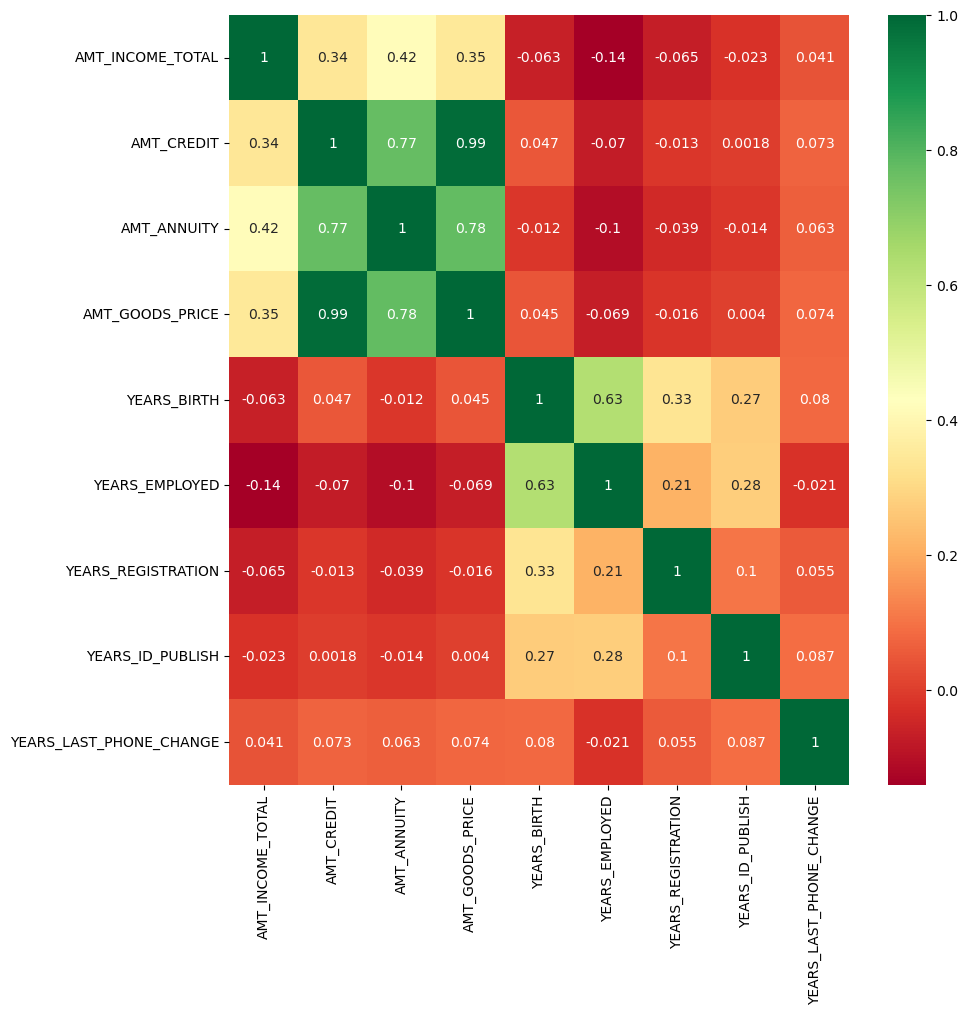

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True, cmap="RdYlGn")
plt.show()

conclusion:

1. AMT_INCOME_TOTAL - It has a positive correlation index of 0.34,0.422,0.35 with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively and
Negative with most of the other Year columns

2. AMT_CREDIT - it has a strong positwe correlaion index of 0.99.0.77 with AMT_GOODS_PRICE, AMT_ANNUITY respectively

3. AMT_ANNUITY - It has positive correlation index of 0.77,0.78 with AMT_CREDIT,AMT_GOOOSz_PRICE respectively and Negative with most of the other
year columas

4. AMT_GOODS_PRICE - it has a strong positive correlation index 0:78,0.99 wth AMIT_ANNUITY, AMT_CREDIT

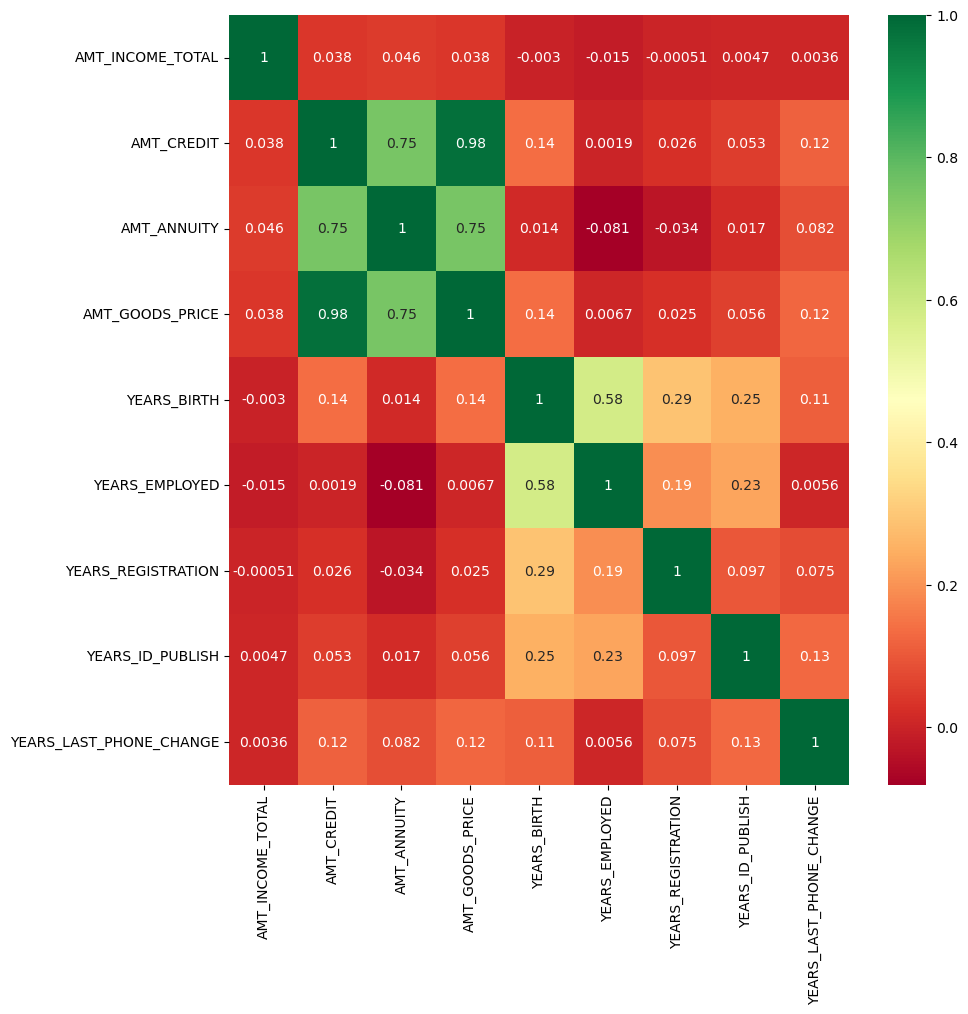

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True, cmap="RdYlGn")
plt.show()

conclusion
1. AMT_INCOME_TOTAL -It is less corretated with AMT_CREDITAMT_ANNUITY,AMT_GOODS_PRICE respectively

2. AMT_CREDIT - It has a strong poste coretaion index of 0.98,0.75 with AMT_GOODS_PRICE, AMT_ANNUITY respectively and also positive corelation
with other Year Columns

3. AMT_ANNUITY - It has posite coretaion index of 0.75 with AMT_CREDITAMT_GOOOS_PRICE and Negative with,
YEAR_EMPLOYED, YEAR_REGISTRATION

4. AMT_GOODS_PRICE - It has a strong postive corelation index 0.75,0.98 wth AMT_ANNUITY, AMT_CREDIT and weak positive correlation with other
Year columns.

# Read Previous Application CSV

In [72]:
papp_data = pd.read_csv("previous_application[1].csv")
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

# Data Inspection on Previous Application dataset
## get info and shape of dataset

In [73]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [74]:
papp_data.shape

(1670214, 37)

# Data quality check
## check for percentage null values in application dataset

In [75]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [76]:
percentage = 49
threshold_p = int(((100 - percentage) / 100) * papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis=1, thresh=threshold_p)
papp_df.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4          

In [77]:
papp_df.shape

(1670214, 32)

# Impute Missing values
## check the dtype of missing values in application dataset before imputing values

In [78]:
# papp_df.DAYS_FIRST_DRAWING = papp_df.DAYS_FIRST_DRAWING.apply( lambda x: abs(x))
# papp_df.DAYS_FIRST_DUE = papp_df.DAYS_FIRST_DUE.apply( lambda x: abs(x))
# papp_df.DAYS_LAST_DUE_1ST_VERSION = papp_df.DAYS_LAST_DUE_1ST_VERSION.apply( lambda x: abs(x))
# papp_df.DAYS_LAST_DUE = papp_df.DAYS_LAST_DUE.apply( lambda x: abs(x))
# papp_df.DAYS_TERMINATION = papp_df.DAYS_TERMINATION.apply( lambda x: abs(x))
# papp_df.DAYS_DECISION = papp_df.DAYS_DECISION.apply( lambda x: abs(x))

In [79]:
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x: abs(x))
    

# validate if any null values present in dataset

In [80]:
null_cols = list(papp_df.columns[papp_df.isna().any()])
len(null_cols)

11

In [81]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

# Binning of continous variables
## Binning AMT_CREDIT column

In [82]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [83]:
papp_df["AMT_CREDIT_Category"] = pd.cut(papp_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000], labels = ["Very low Credit", "Low Credit", "Medium Credit", "High Credit", "Very high credit"])

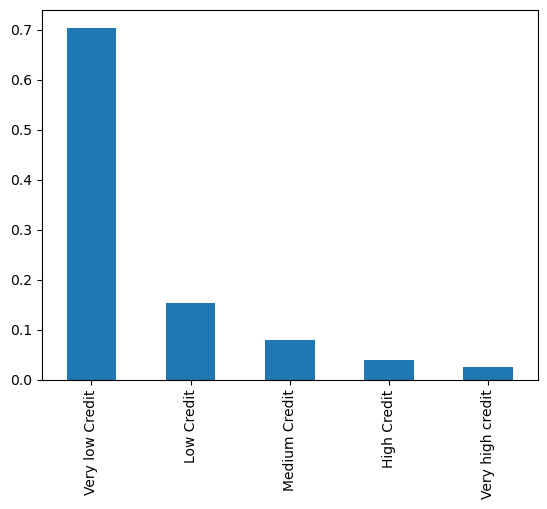

In [84]:
papp_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

conclusion: the credit amount of the loan for most applicants is either low(200000 to 400000)

In [85]:
import pandas as pd
bins = [0, 0.25, 0.45, 0.65, 0.85, 1]
labels = ["Very low Price", "Low Price", "Medium Price", "High Price", "Very high Price"]
papp_df["AMT_GOODS_PRICE"] = pd.cut(papp_df.AMT_GOODS_PRICE, bins=bins, labels=labels)

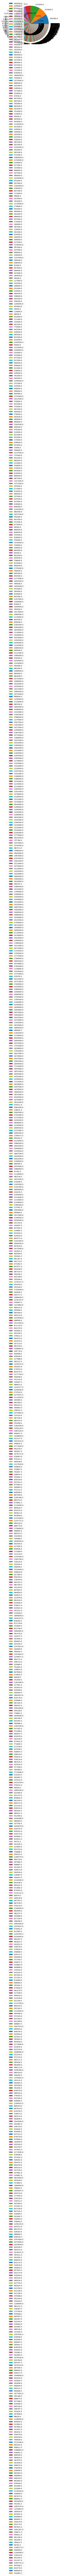

In [86]:
app_df.AMT_GOODS_PRICE.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

# Data imbalance check

# Dividing application dataset with NAME_CONTRACT_STATUS

In [87]:
Approved = papp_df[papp_df.NAME_CONTRACT_STATUS == "Approved"]
Cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == "Cancelled"]
Refused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Refused"]
Unused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Unused offer"]

In [88]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

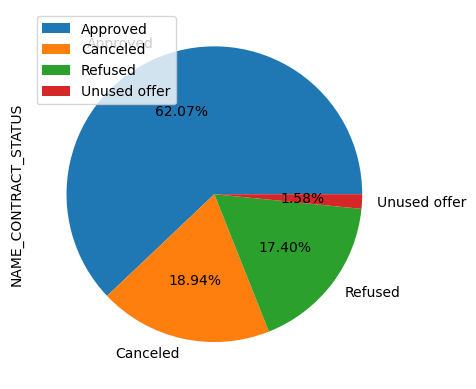

In [89]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.legend()
plt.show()

conclusion: 62% pf the applicants ahve the loan approved, 18% have canceled, 17% have refused, 2% has unused.

# Univariate Analysis

In [90]:
cat_cols = list(papp_df.columns[papp_df.dtypes == np.object])
num_cols = list(papp_df.columns[papp_df.dtypes == np.int64]) + list(papp_df.columns[papp_df.dtypes == np.float64])

In [91]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [92]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [93]:
cat_cols = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "NAME_CLIENT_TYPE", "NAME_SELLER_INDUSTRY", "CHANNEL_TYPE", "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]

In [94]:
num_cols = ["DAYS_DECISION", "HOUR_APPR_PROCESS_START", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]

# Plot on categorial columns

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64


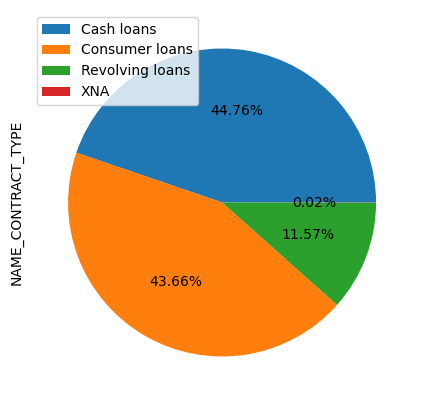

---------
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


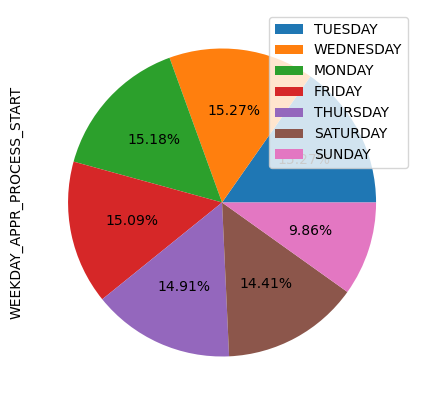

---------
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


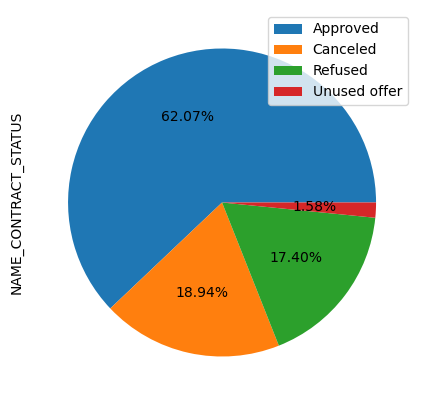

---------
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64


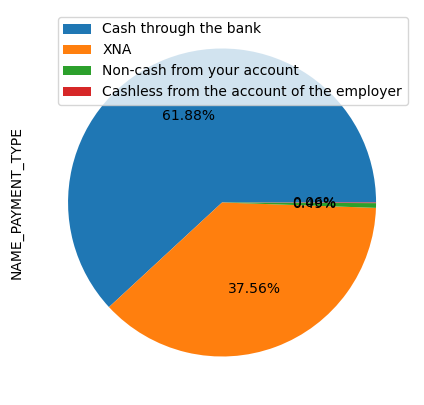

---------
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64


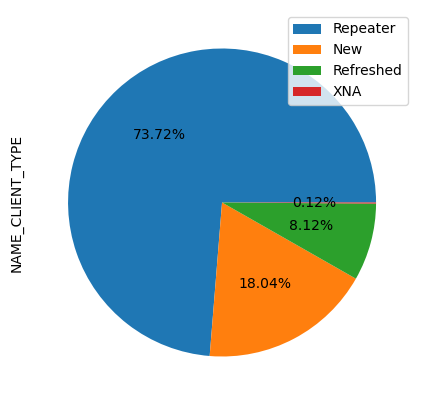

---------
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64


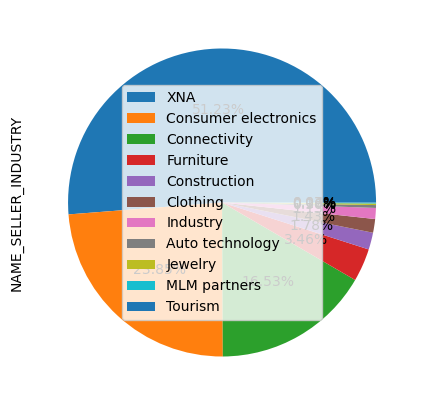

---------
Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64


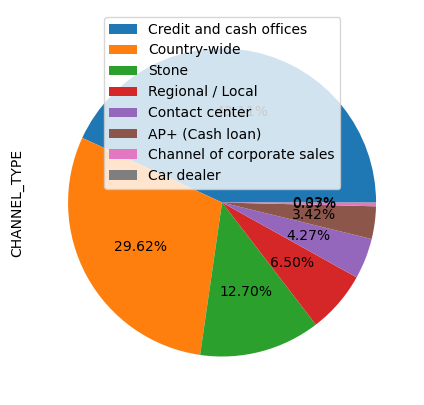

---------
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64


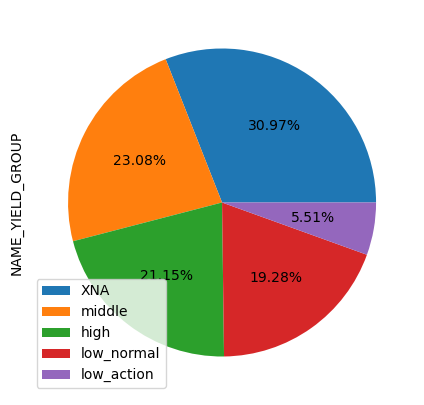

---------
Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64


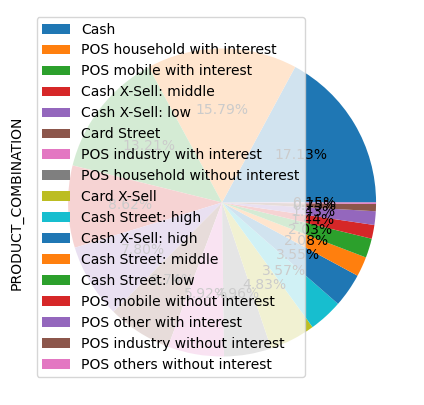

---------


In [95]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print('---------')

# Plot on numerical columns

99th percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


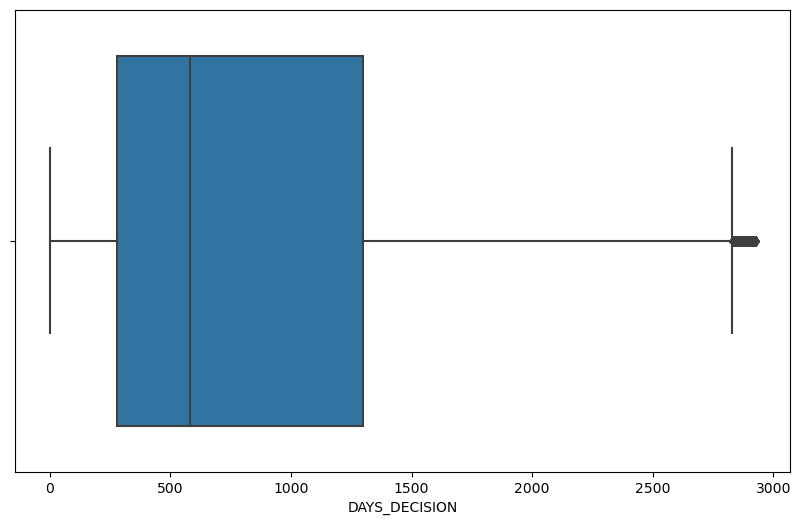

---------------
99th percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


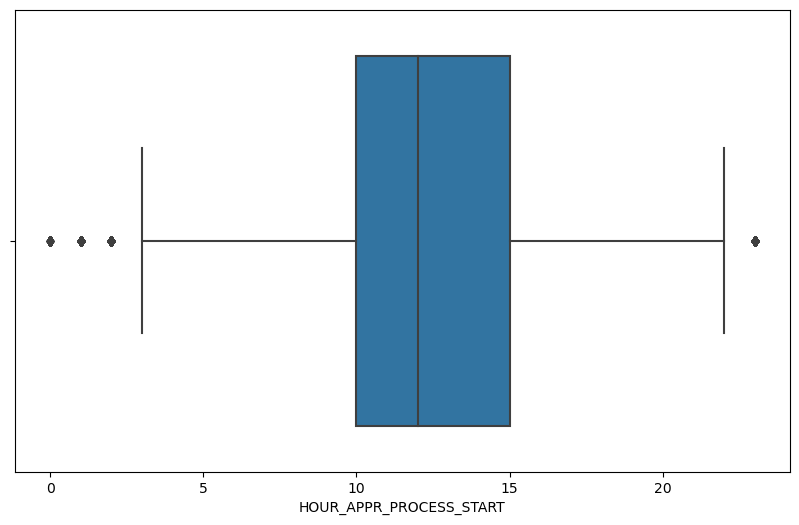

---------------
99th percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


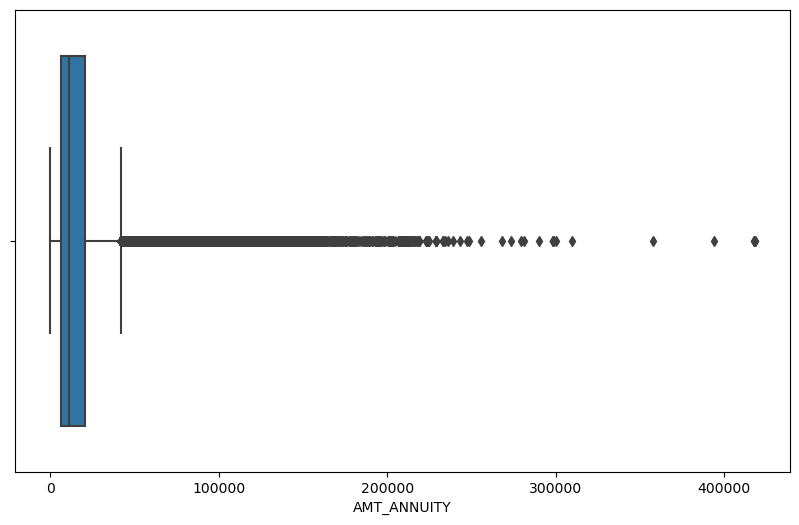

---------------
99th percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


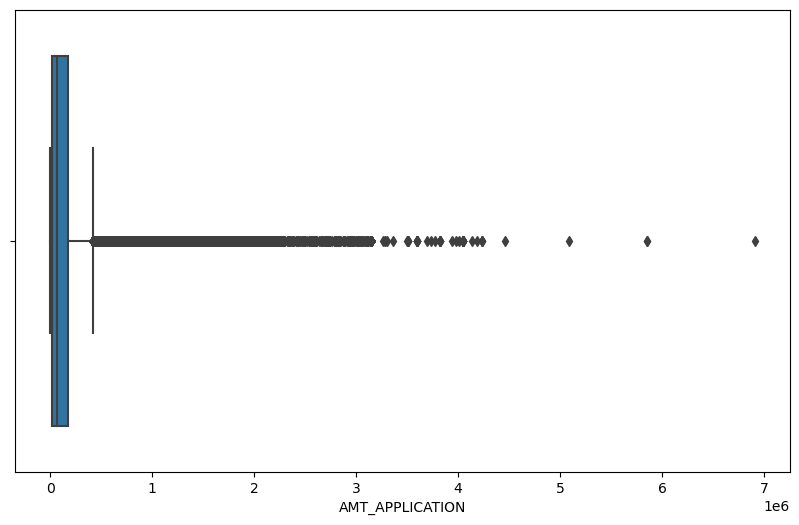

---------------
99th percentile nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


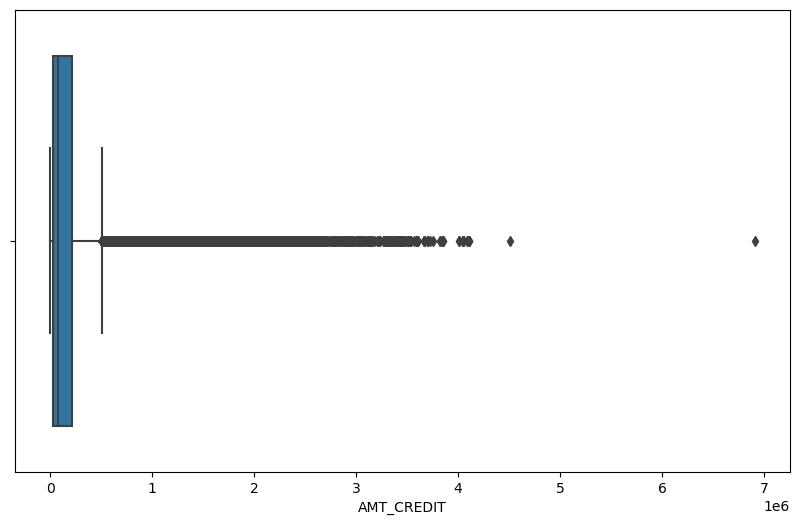

---------------
99th percentile nan
count       0
unique      0
top       NaN
freq      NaN
Name: AMT_GOODS_PRICE, dtype: object


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1000x600 with 0 Axes>

In [96]:
for col in num_cols:
    print("99th percentile", np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df,x=col)
    plt.show()
    print('---------------')

# Bivariate and Multivariate analysis

# Bivariate analysis between WEEKDAY_APPR_PROCESS_START vs AMT_APPLICATION

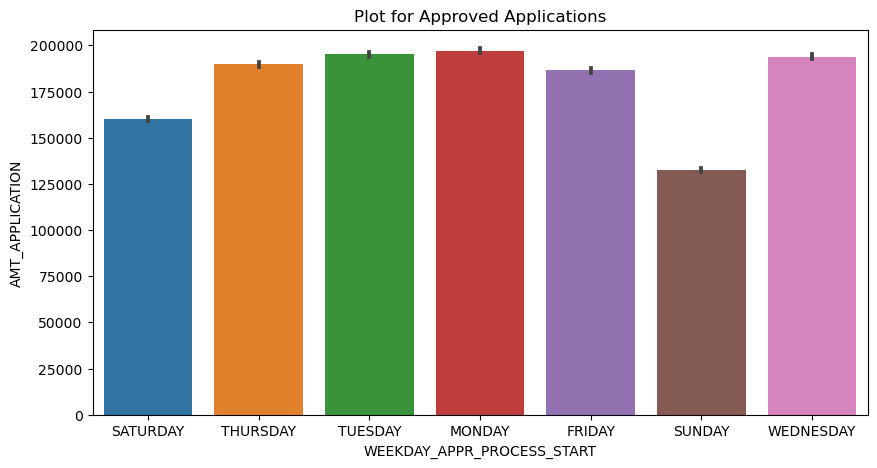

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your data into the 'approved' DataFrame

plt.figure(figsize=[10, 5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=Approved)
plt.title("Plot for Approved Applications")
plt.show()


Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL, AMT_CREDIT_Category]
Index: []
WEEKDAY_APPR_PROCESS_START    0.0
AMT_APPLICATION               0.0
dtype: float64
SK_ID_PREV                        int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_GOOD

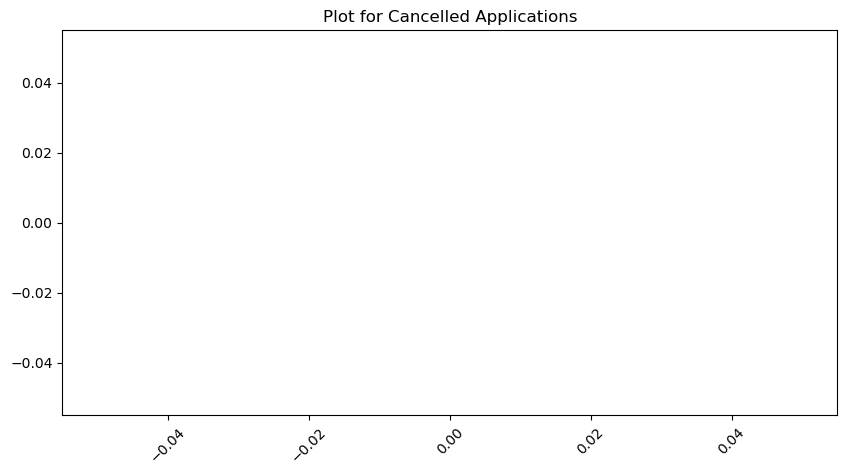

ValueError: min() arg is an empty sequence

<Figure size 1000x500 with 0 Axes>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your data into the 'Cancelled' DataFrame

# Print the first few rows of the DataFrame to inspect the data
print(Cancelled.head())

# Check for missing values in the columns you're using for plotting
print(Cancelled[['WEEKDAY_APPR_PROCESS_START', 'AMT_APPLICATION']].isnull().sum())

# Ensure the data types are appropriate
print(Cancelled.dtypes)

# Create a simple bar plot using Matplotlib
plt.figure(figsize=[10, 5])
plt.bar(x=Cancelled['WEEKDAY_APPR_PROCESS_START'], height=Cancelled['AMT_APPLICATION'])
plt.title("Plot for Cancelled Applications")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Create a bar plot using Seaborn
plt.figure(figsize=[10, 5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=Cancelled)
plt.title("Plot for Cancelled Applications")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


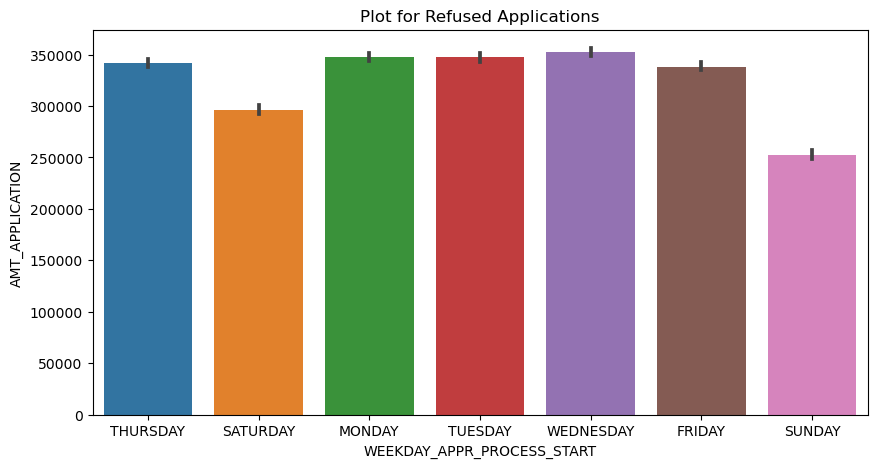

In [99]:
plt.figure(figsize=[10, 5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=Refused)
plt.title("Plot for Refused Applications")
plt.show()

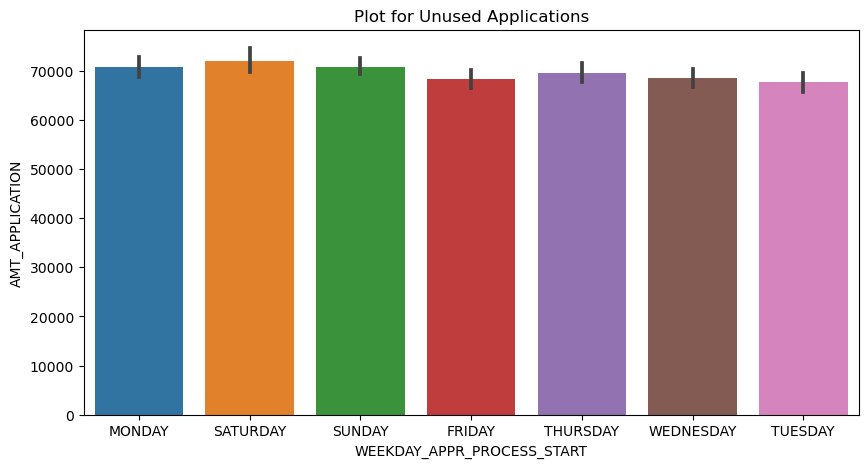

In [100]:
plt.figure(figsize=[10, 5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=Unused)
plt.title("Plot for Unused Applications")
plt.show()

# Bivarient Analysis between AMT_ANNUITY vs AMT_GOODS_PRICE

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0             NaN                   SATURDAY   
1    679671.0             NaN                   THURSDAY   
2    136444.5             NaN                    TUESDAY   
3    470790.0             NaN                     MONDAY   
5    340573.5             NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y

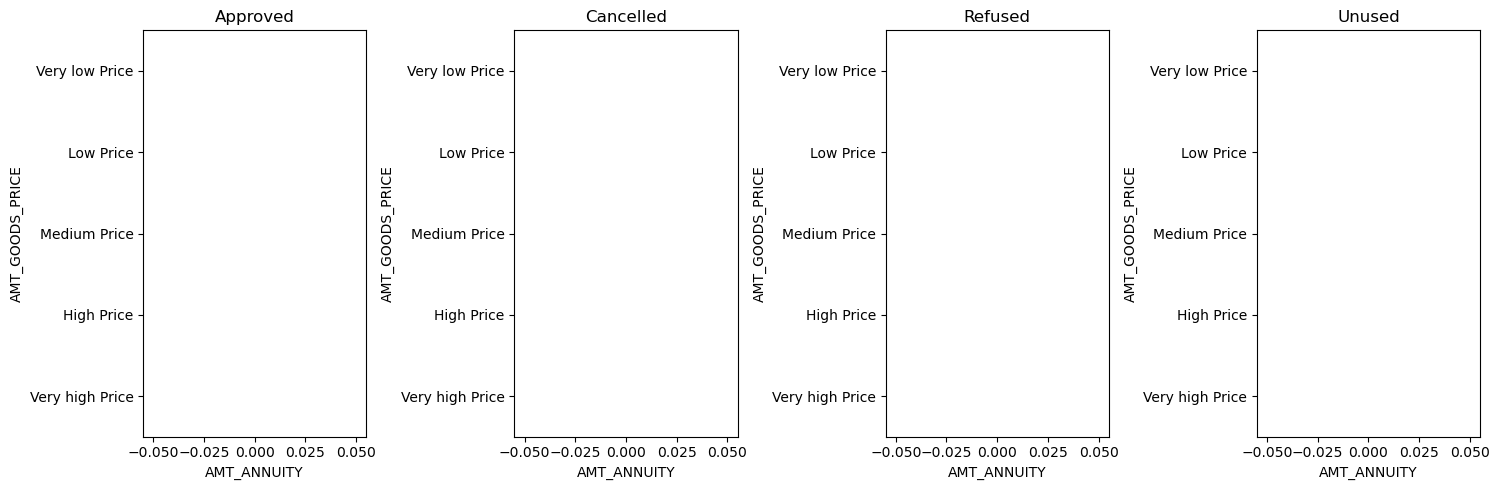

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data into 'Approved', 'Cancelled', 'Refused', and 'Unused' DataFrames

# Check the first few rows of each DataFrame to ensure data is loaded correctly
print(Approved.head())
print(Cancelled.head())
print(Refused.head())
print(Unused.head())

# Create subplots
plt.figure(figsize=(15, 5))

# Subplot 1
plt.subplot(1, 4, 1)
sns.barplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=Approved)
plt.title("Approved")

# Subplot 2
plt.subplot(1, 4, 2)
sns.barplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=Cancelled)
plt.title("Cancelled")

# Subplot 3
plt.subplot(1, 4, 3)
sns.barplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=Refused)
plt.title("Refused")

# Subplot 4
plt.subplot(1, 4, 4)
sns.barplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=Unused)
plt.title("Unused")

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


conclusion >> 
1. For loan status as Approved, Refused, Cancelled amount of annuity increases with goods price
2. For loan status as Refused it has no linear relationship

# Co-relation between Numerical Columns

In [102]:
corr_Approved = Approved[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_Refused = Refused[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_Cancelled = Cancelled[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_Unused = Unused[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]

# Co-relation for Numerical Columns for Approved

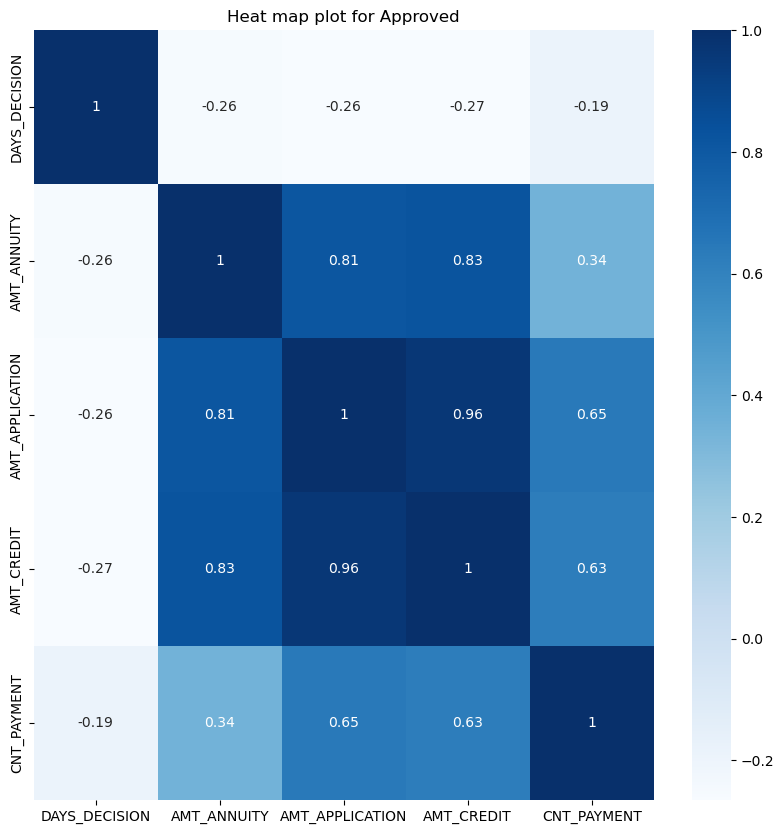

In [103]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_Approved.corr(),annot=True,cmap='Blues')
plt.title("Heat map plot for Approved")
plt.show()

Conclusion >>
1. AMT_APPLICATION has higher correlation with AMT_CREDIT and AMT_GOODS_PRICE,AMT_ANNUITY
2. DAYS_DECISION has negative correlation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION_PAYMENT,AMT_ANNUITY

# Co-relation for Numerical Columns for Refused

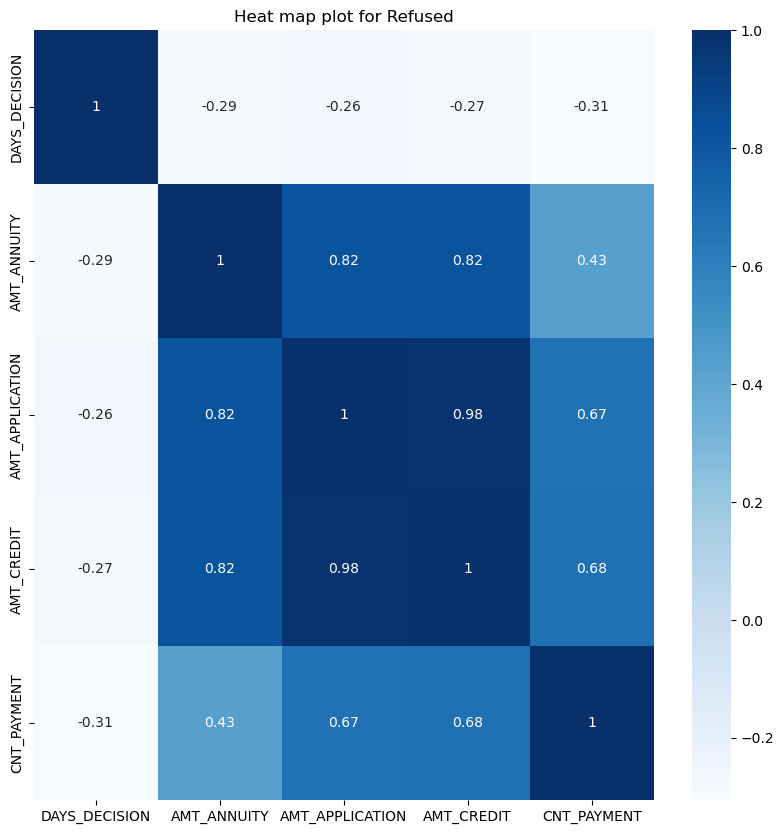

In [104]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_Refused.corr(),annot=True,cmap='Blues')
plt.title("Heat map plot for Refused")
plt.show()

Conclusion >> For Refused Category

1. AMT_APPLICATION has higher correlation with AMT_CREDIT and AMT_GOODS_PRICE,AMT_ANNUITY
2. DAYS_DECISION has negative correlation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION_PAYMENT,AMT_ANNUITY

# Co-relation for Numerical Columns for Cancelled

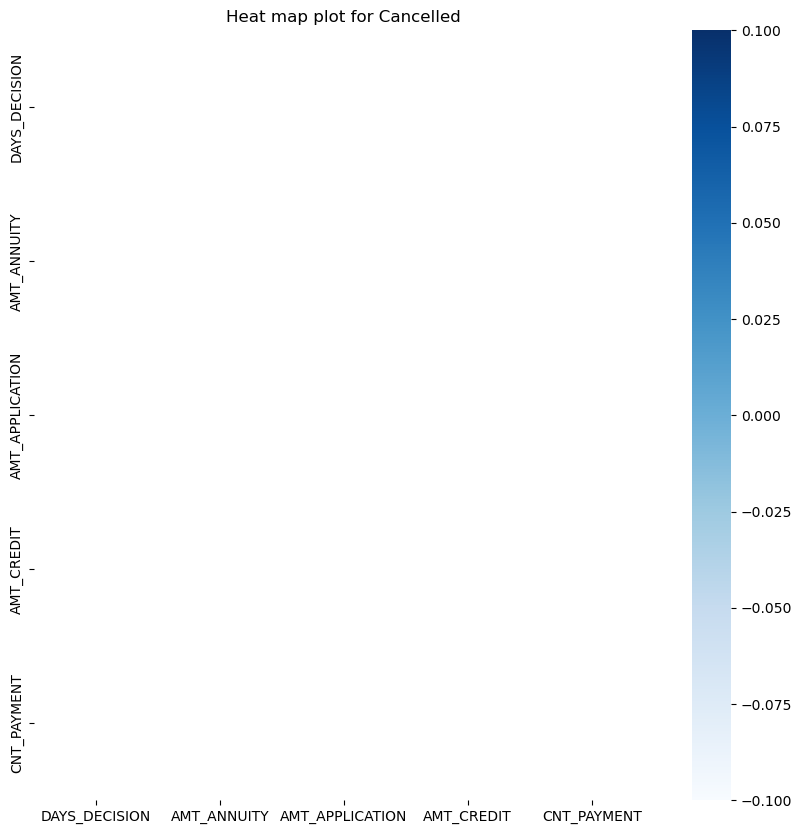

In [105]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_Cancelled.corr(),annot=True,cmap='Blues')
plt.title("Heat map plot for Cancelled")
plt.show()

Conclusion >> For Cancelled Category

1. AMT_APPLICATION has higher correlation with AMT_CREDIT and AMT_GOODS_PRICE,AMT_ANNUITY
2. DAYS_DECISION has negative correlation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION_PAYMENT,AMT_ANNUITY

# Co-relation for Numerical Columns for Unused

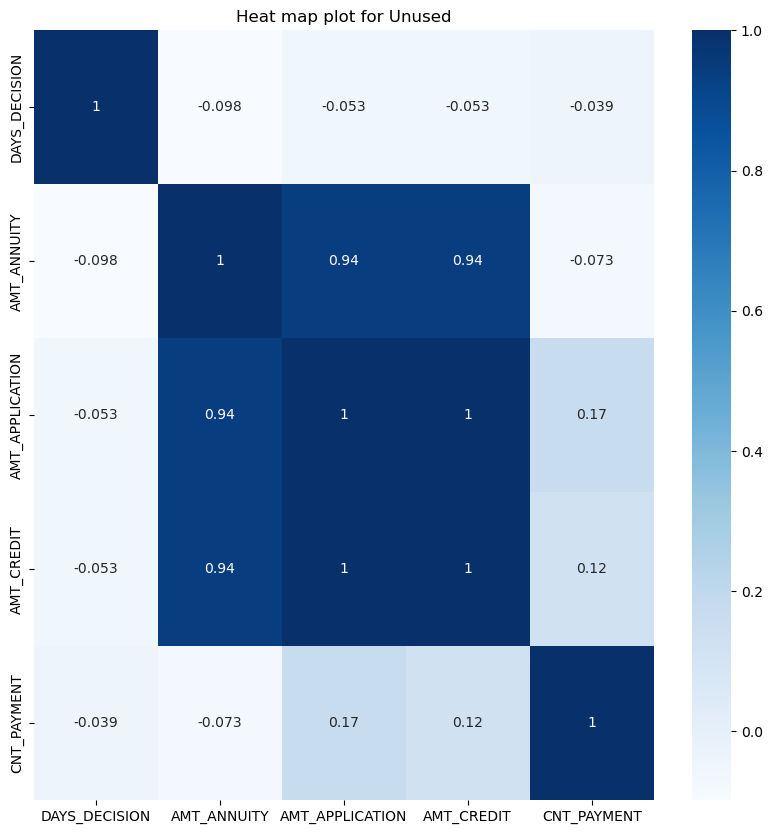

In [106]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_Unused.corr(),annot=True,cmap='Blues')
plt.title("Heat map plot for Unused")
plt.show()

Conclusion >> For Unused Category

1. AMT_APPLICATION has higher correlation with AMT_CREDIT and AMT_GOODS_PRICE
2. DAYS_DECISION and CNT_PAYMENT has negative correlation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION_PAYMENT

# Merge the Application and Previous Application Dataframes

In [107]:
merge_df = app_df.merge(papp_df, on=["SK_ID_CURR"], how = 'left')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [108]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 112 entries, SK_ID_CURR to AMT_CREDIT_Category_y
dtypes: category(4), float64(35), int64(46), object(27)
memory usage: 1.2+ GB


# Filtering required columns for our Analysis

In [110]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col, axis=1, inplace=True)
    

In [111]:
merge_df.shape

(1430155, 83)

In [113]:
res1 = pd.pivot_table(data=merge_df, index=["NAME_INCOME_TYPE", "NAME_CLIENT_TYPE"], columns=["NAME_CONTRACT_STATUS"], values="TARGET", aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

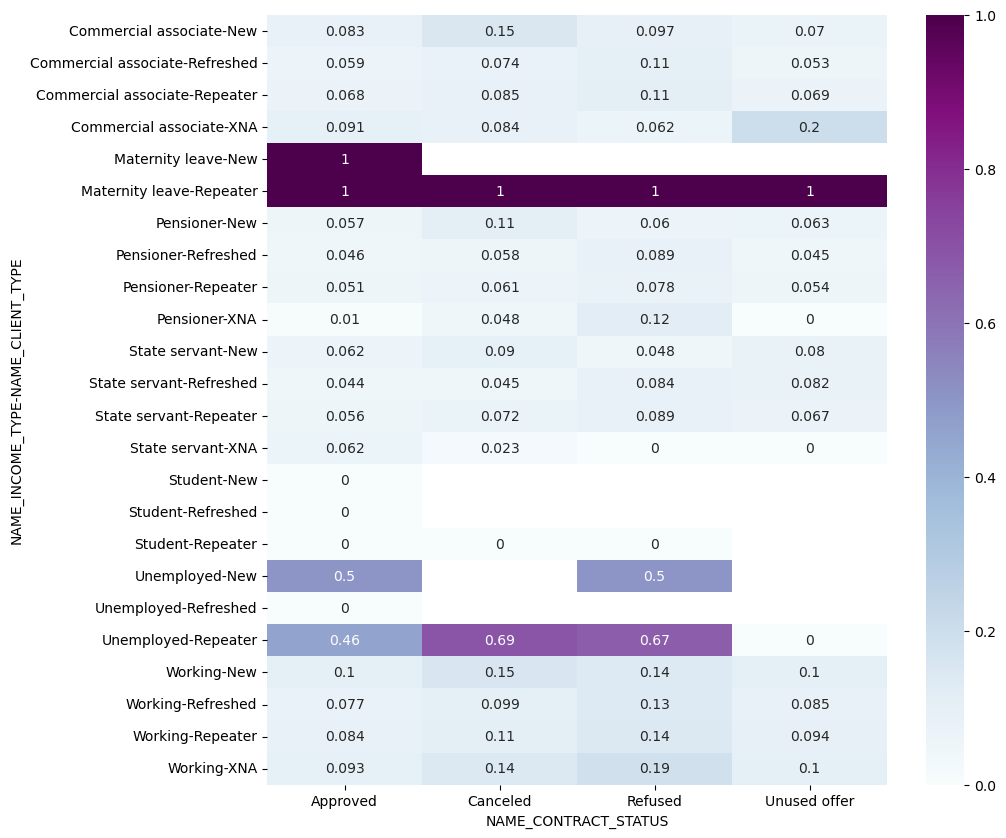

In [114]:
plt.figure(figsize=[10,10])
sns.heatmap(res1, annot=True, cmap='BuPu')
plt.show()

Conclusion >>
1. Applications with income type Maternity leave and client type New are having more chances of getting the loan Approved
2. Applications with income type Maternity leave, Unemployed and client type Repeaters are having getting the loan Cancelled
3. Applications with income type Maternity leave, Unemployed and client type Repeaters are having getting the loan Refused
4. Applications with income type Maternity leave and client type Repeaters, Working and Client type New are not able to utilize the Bank's offer

In [117]:
res2 = pd.pivot_table(data=merge_df, index=["CODE_GENDER", "NAME_SELLER_INDUSTRY"], columns=["TARGET"], values="AMT_GOODS_PRICE_x", aggfunc='sum')

In [118]:
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

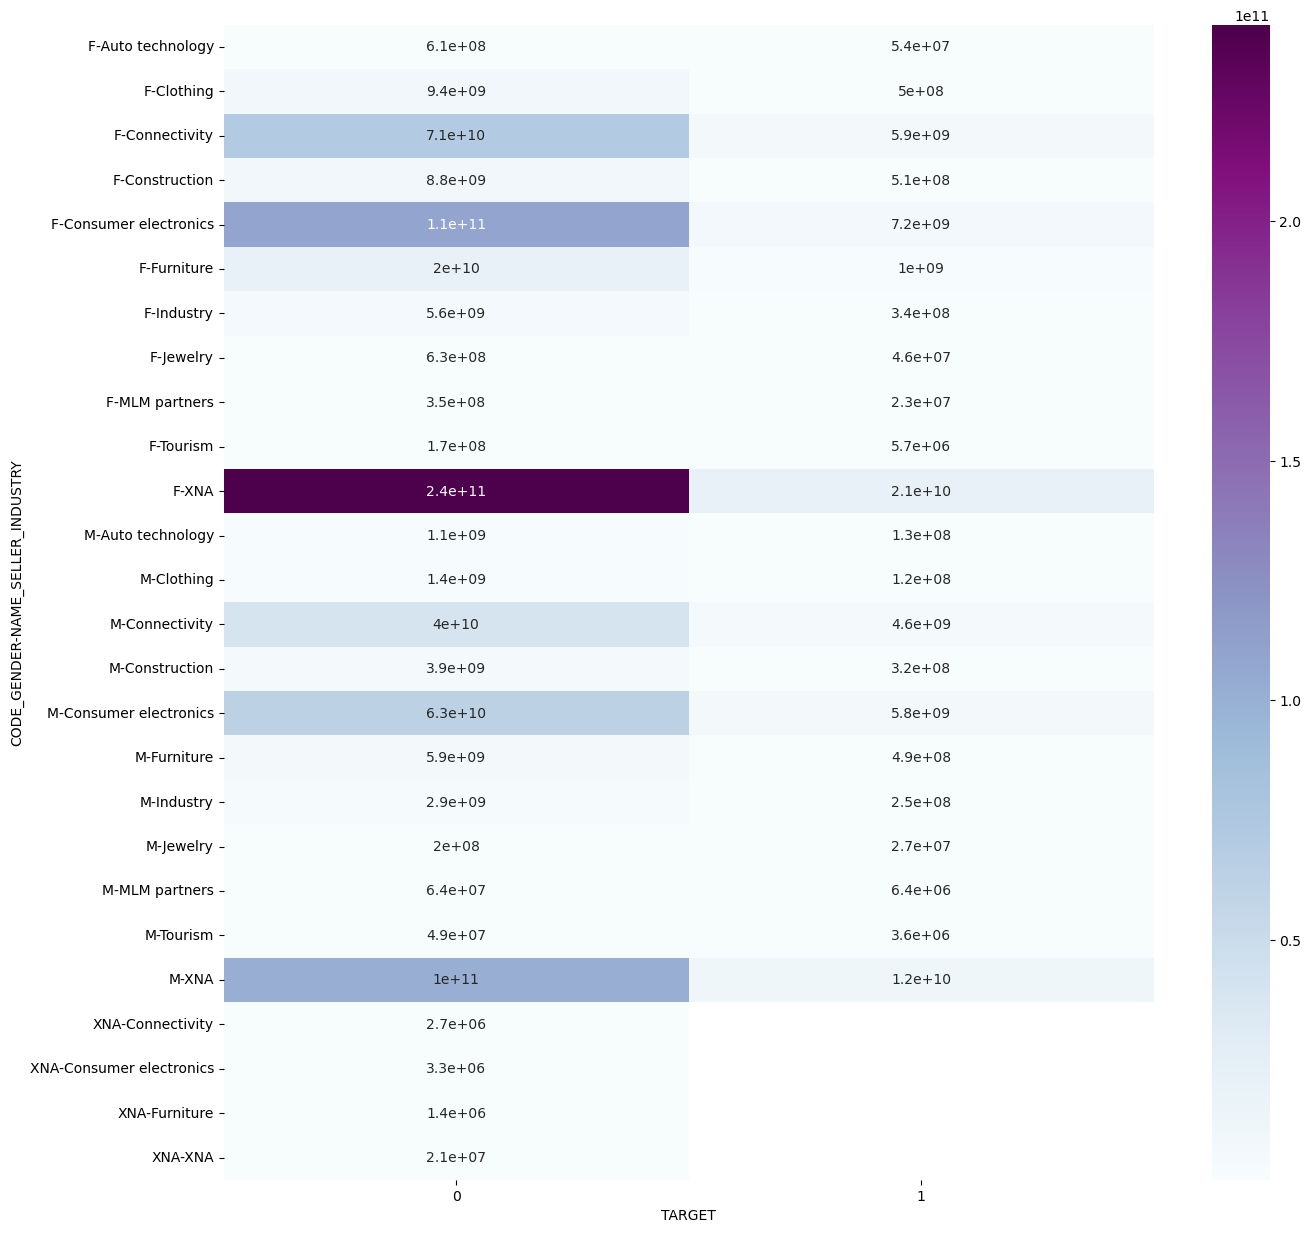

In [119]:
plt.figure(figsize=[15,15])
sns.heatmap(res2, annot=True, cmap='BuPu')
plt.show()